<a href="https://colab.research.google.com/github/thiagocquinto/datascience/blob/main/MVP1_Thiago_Quinto_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MVP de Análise de Dados e Boas Práticas

**Thiago Correa do Quinto**

#1. Definição do Problema

O dataset utilizado neste projeto será o **Productivity Prediction of Garment Employees**. Este conjunto de dados da indústria de vestuário pode ser usado para fins de regressão, prevendo a faixa de produtividade (0-1) ou para fins de classificação, transformando a faixa de produtividade (0-1) em diferentes classes, dos quais pode ser utilizada a abordagem de aprendizagem supervisionada.

A indústria do vestuário é um dos principais exemplos da globalização industrial desta era moderna. É uma indústria altamente dependente de  mão-de-obra pois possui muitos processos manuais.

Deste modo, para atender a enorme demanda global por produtos de vestuário depende principalmente do desempenho de produção e entrega dos funcionários nas empresas de fabricação de roupas. Portanto, é altamente desejável entre os tomadores de decisão na indústria de vestuário rastrear, analisar e prever o desempenho da produtividade das equipes de trabalho em suas fábricas.

Para mais detalhes sobre este dataset, consulte: https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#


**Informações sobre os atributos:**

1. **date :** Data no formato original MM-DD-YYYY (de 01-01-2015 a 03-11-2015)
2. **day :** Dia da semana
3. **quarter :** Uma porção do mês. Um mês é divido em 4 ou 5 partes de 7 dias cada
4. **department :** Departamento associado com a instância
5. **team_no :** número da equipe associada com a instância
6. **no_of_workers :** Número de trabalhadores em cada equipe
7. **no_of_style_change :** Número de mudanças no estilo em um determinado produto
8. **targeted_productivity :** Meta de Produtividade por equipe por dia
9. **smv :** Tempo alocado para uma tarefa em minutos
10. **wip :** Trabalho em progresso. Inclui o número de itens não finalizados por produtos
11. **over_time :** Quantidade de horas extras por equipe em minutos
12. **incentive :** Quantidade de incentivo financeiro (em BDT) que permite ou motiva um determinado curso de ação
13. **idle_time :** Quantidade de tempo de interrupção de produção por diversos motivos
14. **idle_men :** Número de trabalhadores que ficaram ociosos devido à interrupção da produção
15. **actual_productivity :** % atual da produtividade entregue pelos trabalhadores. Ela varia de 0-1.

In [1]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder # para onehotenconder
from sklearn.linear_model import LinearRegression # Será utilizada a regressão linear
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste
from sklearn.metrics import confusion_matrix # para a exibição da matriz de confusão do modelo
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.svm import SVC # para utilizar o algoritmo SVM


In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv já com os cabeçalhos

In [3]:
# importando dados de url para um dataframe

# url a importar
url_dados='https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv'

# carga do dataset através da url - foi utilizado o parâmetro parse_dates para
# já converter o formato para data da coluna date
workers=pd.read_csv(url_dados, parse_dates=['date'])

display(workers.head(20)) # foram carregadas 20 linhas para ter uma visão melhor dos dados do dataset

date   quarter  department       day  team  targeted_productivity  \
0  2015-01-01  Quarter1      sweing  Thursday     8                   0.80   
1  2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2  2015-01-01  Quarter1      sweing  Thursday    11                   0.80   
3  2015-01-01  Quarter1      sweing  Thursday    12                   0.80   
4  2015-01-01  Quarter1      sweing  Thursday     6                   0.80   
5  2015-01-01  Quarter1      sweing  Thursday     7                   0.80   
6  2015-01-01  Quarter1  finishing   Thursday     2                   0.75   
7  2015-01-01  Quarter1      sweing  Thursday     3                   0.75   
8  2015-01-01  Quarter1      sweing  Thursday     2                   0.75   
9  2015-01-01  Quarter1      sweing  Thursday     1                   0.75   
10 2015-01-01  Quarter1      sweing  Thursday     9                   0.70   
11 2015-01-01  Quarter1      sweing  Thursday    10                   0.75   
12 2015-01-01  Quarter1      sweing  Thursday     5                   0.80   
13 2015-01-01  Quarter1  finishing   Thursday    10                   0.65   
14 2015-01-01  Quarter1  finishing   Thursday     8                   0.75   
15 2015-01-01  Quarter1  finishing   Thursday     4                   0.75   
16 2015-01-01  Quarter1  finishing   Thursday     7                   0.80   
17 2015-01-01  Quarter1      sweing  Thursday     4                   0.65   
18 2015-01-01  Quarter1   finishing  Thursday    11                   0.70   
19 2015-01-03  Quarter1  finishing   Saturday     4                   0.80   

      smv     wip  over_time  incentive  idle_time  idle_men  \
0   26.16  1108.0       7080         98        0.0         0   
1    3.94     NaN        960          0        0.0         0   
2   11.41   968.0       3660         50        0.0         0   
3   11.41   968.0       3660         50        0.0         0   
4   25.90  1170.0       1920         50        0.0         0   
5   25.90   984.0       6720         38        0.0         0   
6    3.94     NaN        960          0        0.0         0   
7   28.08   795.0       6900         45        0.0         0   
8   19.87   733.0       6000         34        0.0         0   
9   28.08   681.0       6900         45        0.0         0   
10  28.08   872.0       6900         44        0.0         0   
11  19.31   578.0       6480         45        0.0         0   
12  11.41   668.0       3660         50        0.0         0   
13   3.94     NaN        960          0        0.0         0   
14   2.90     NaN        960          0        0.0         0   
15   3.94     NaN       2160          0        0.0         0   
16   2.90     NaN        960          0        0.0         0   
17  23.69   861.0       7200          0        0.0         0   
18   4.15     NaN       1440          0        0.0         0   
19   4.15     NaN       6600          0        0.0         0   

    no_of_style_change  no_of_workers  actual_productivity  
0                    0           59.0             0.940725  
1                    0            8.0             0.886500  
2                    0           30.5             0.800570  
3                    0           30.5             0.800570  
4                    0           56.0             0.800382  
5                    0           56.0             0.800125  
6                    0            8.0             0.755167  
7                    0           57.5             0.753683  
8                    0           55.0             0.753098  
9                    0           57.5             0.750428  
10                   0           57.5             0.721127  
11                   0           54.0             0.712205  
12                   0           30.5             0.707046  
13                   0            8.0             0.705917  
14                   0            8.0             0.676667  
15                   0           18.0            

Para ter uma ideia de como os dados estão organizados, carregamos as 20 primeiras linhas. Podemos perceber que quase todos as equipes (team) são alocados no mesmo dia e às vezes em mais de um departamento.

#3. Análise de Dados

##3.1. Estatísticas Descritivas
Vamos examinar o dataset para obter informações sobre o conjunto de dados

In [4]:
print(workers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

O dataset tem dimensão de 1197 linhas por 15 colunas com série temporal. Dentro destas colunas temos dados do tipo *string*, *float* e *inteiros*. A coluna **'wip'** tem dados nulos. A coluna **'date'** retrata a série temporal do dados. Como a coluna team não se trata de número, mas sim IDs das equipes, devemos converter de *float* para *string*.

In [5]:
workers['team']=workers['team'].astype(str)
print(workers.dtypes)

date                     datetime64[ns]
quarter                          object
department                       object
day                              object
team                             object
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object


A seguir vamos resumir algumas propriedades estatísticas do dataset (média, desvio padrão, mínimo, máximo e os quartis).

In [6]:
display(workers.describe())

targeted_productivity          smv           wip     over_time  \
count            1197.000000  1197.000000    691.000000   1197.000000   
mean                0.729632    15.062172   1190.465991   4567.460317   
std                 0.097891    10.943219   1837.455001   3348.823563   
min                 0.070000     2.900000      7.000000      0.000000   
25%                 0.700000     3.940000    774.500000   1440.000000   
50%                 0.750000    15.260000   1039.000000   3960.000000   
75%                 0.800000    24.260000   1252.500000   6960.000000   
max                 0.800000    54.560000  23122.000000  25920.000000   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean     38.210526     0.730159     0.369256            0.150376   
std     160.182643    12.709757     3.268987            0.427848   
min       0.000000     0.000000     0.000000            0.000000   
25%       0.000000     0.000000     0.000000            0.000000   
50%       0.000000     0.000000     0.000000            0.000000   
75%      50.000000     0.000000     0.000000            0.000000   
max    3600.000000   300.000000    45.000000            2.000000   

       no_of_workers  actual_productivity  
count    1197.000000          1197.000000  
mean       34.609858             0.735091  
std        22.197687             0.174488  
min         2.000000             0.233705  
25%         9.000000             0.650307  
50%        34.000000             0.773333  
75%        57.000000             0.850253  
max        89.000000             1.120437

Destaque para alguns candidatos a *outliers* e possibilidade de tratamento dos dados nulos em **wip**. Nas colunas **idle_time** e **idle_men** tem um elevado número de zeros.

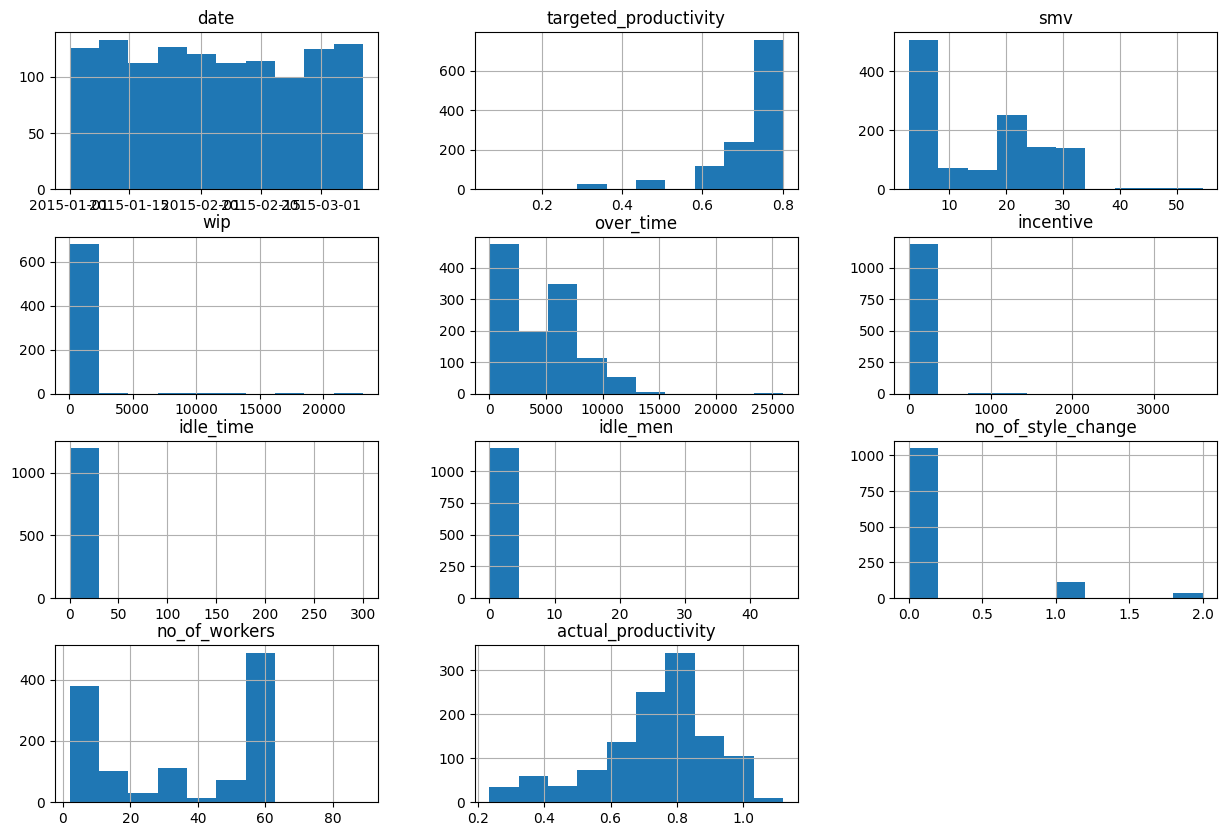

In [7]:
workers.hist(figsize = (15,10));

Podemos perceber graficamente pelos histogramas que as colunas **wip**, **incentive**, **idle_time**, **idle_men** possuem um elevado número de valores próximos a zero. O número de registro por data parece ser constante. A coluna **target_productivity** apresenta uma concentração de valores entre 0.6 e 0.8 e valores baixos para uma meta (menor do que 0.5), o que pode ser uma entrada de dados errados no dataset. A coluna **no_of_style_change** parece ter apenas 3 valores (0, 1 e 2), o que será explorado na próxima seção. A concentração de valores da coluna **actual_productivity** parece normal levemente deslocada para direita. As demais colunas aparentam ter uma distribuição exponencial.


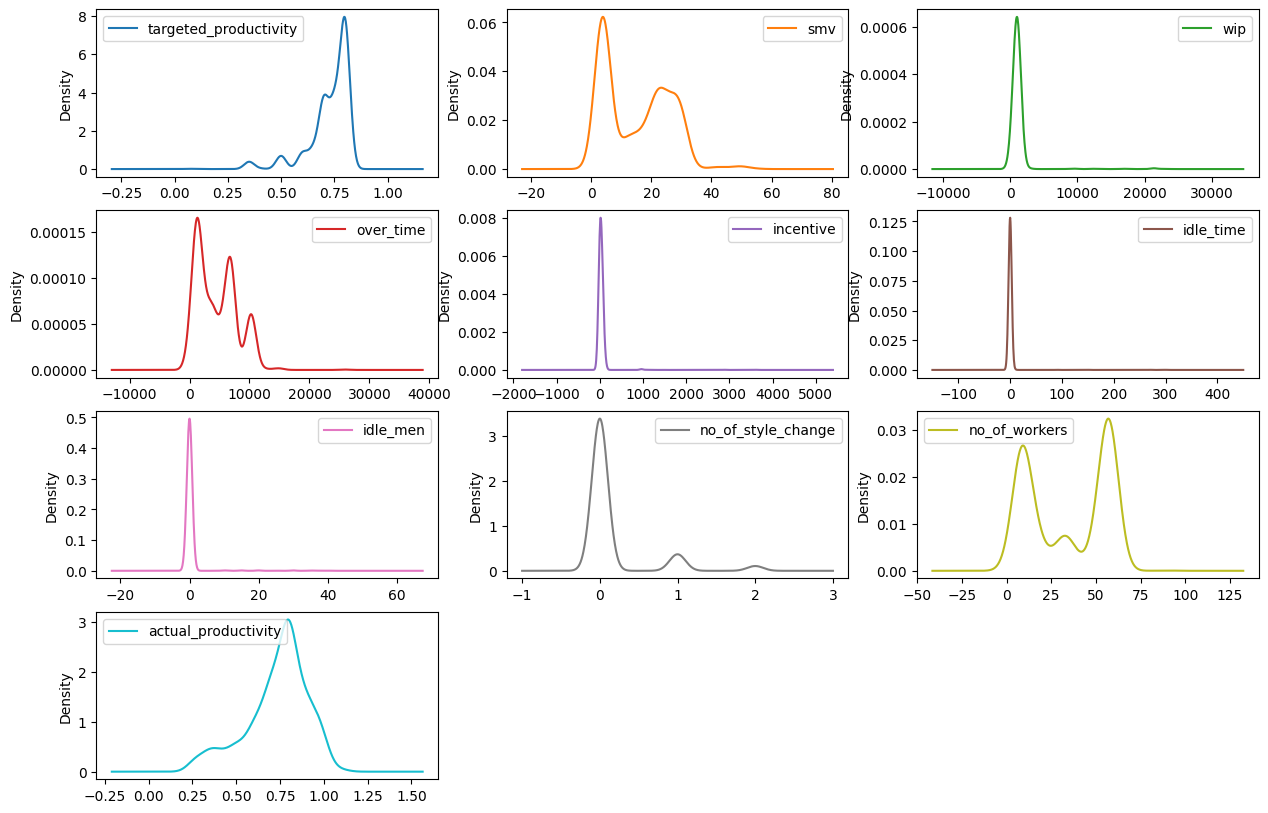

In [8]:
# Gráfico de Densidade
# Foi removida da análise a coluna 'date' através da função iloc
workers.iloc[:,1:].plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (15,10))
plt.show()

Pelos gráficos de densidade de frequência, podemos percerber as concentrações dos valores das principais colunas, reforçando as informações já apresentadas no histograma, tais como elevado número de zeros nas colunas **wip**, **incentive**, **idle_time**, **idle_men**, concentração da meta e do realizado de produtividade em torno de 75%, na coluna **no_of_style_change** concentrados em 0, 1 e 2 e concentração do número de trabalhadores (**no_of_workers**) em torno do primeiro e terceiro quartil.


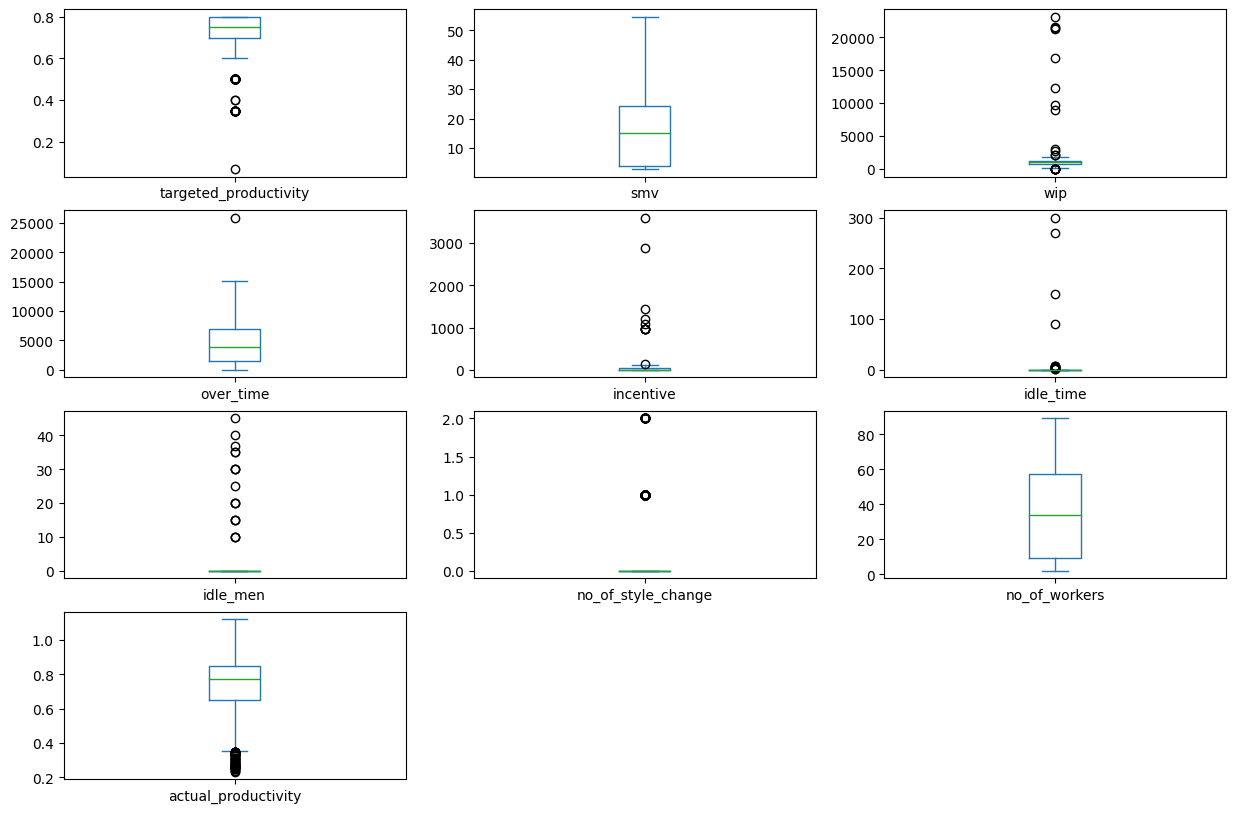

In [9]:
# Boxplot
# Foi retirada a coluna date para gerar os gráficos de boxplots
workers.iloc[:,1:].plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Nos gráficos de boxplots podemos identificas algumas particularidades.

Nas colunas **targeted_productivity**, **smv**, **over_time**, **no_of_workers** e **actual_productivity** apresentam um gráfico bem definido com fácil identificação dos *outliers*, quando existem, e os limites de concentração dos dados.

Já nas colunas **wip**, **incentive**, **idle_time**, **idle_men** e **no_of_style_change** apresentam um resultado que requer um tratamento extra, como retirar *outliers* ou utilizar outro tipo de representação, que serão tratados nas próximas seções.


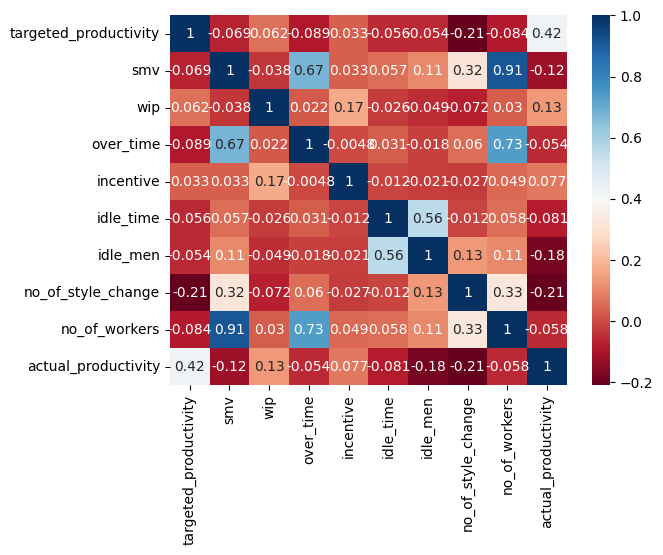

In [10]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(workers.corr(), annot=True, cmap='RdBu');

Como podemos verificar, existe uma alta correlação positiva entre **over_time** e **smv**, **no_of_workers** e **smv**, **no_of_workers** e **over_time**, uma média correlação entre **idle_men** e **idle_time**, **actual_productivity** e **targeted_productivity**. Existe uma baixa correlação negativa entre **actual_productivity** e **idle_men**, **actual_productivity** e **no_of_style_change**, que está distorcida em função da escala do mapa de calor.

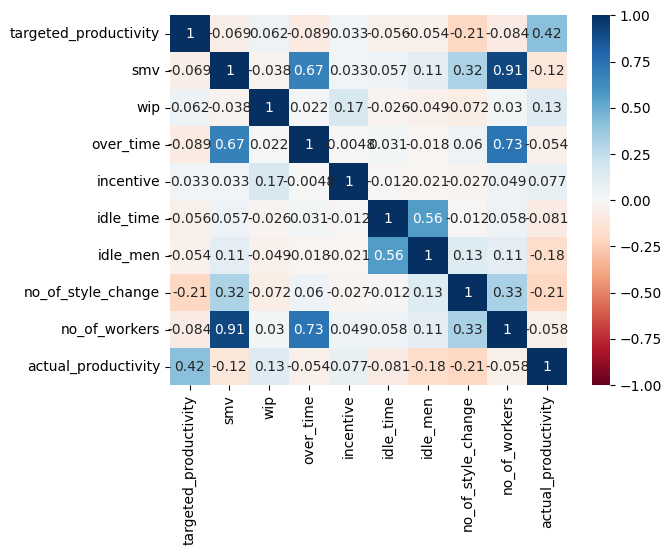

In [11]:
# Matriz de Correlação com Matplotlib Seaborn - mudança de escala de cores entre -1 e 1
sns.heatmap(workers.corr(), annot=True, cmap='RdBu',vmin=-1, vmax=1);

Neste novo mapa de calor, foi normalizado os valores extremos para ficar entre -1 e 1, e, desta forma, tirar o efeito visual das baixas correlações negativas.

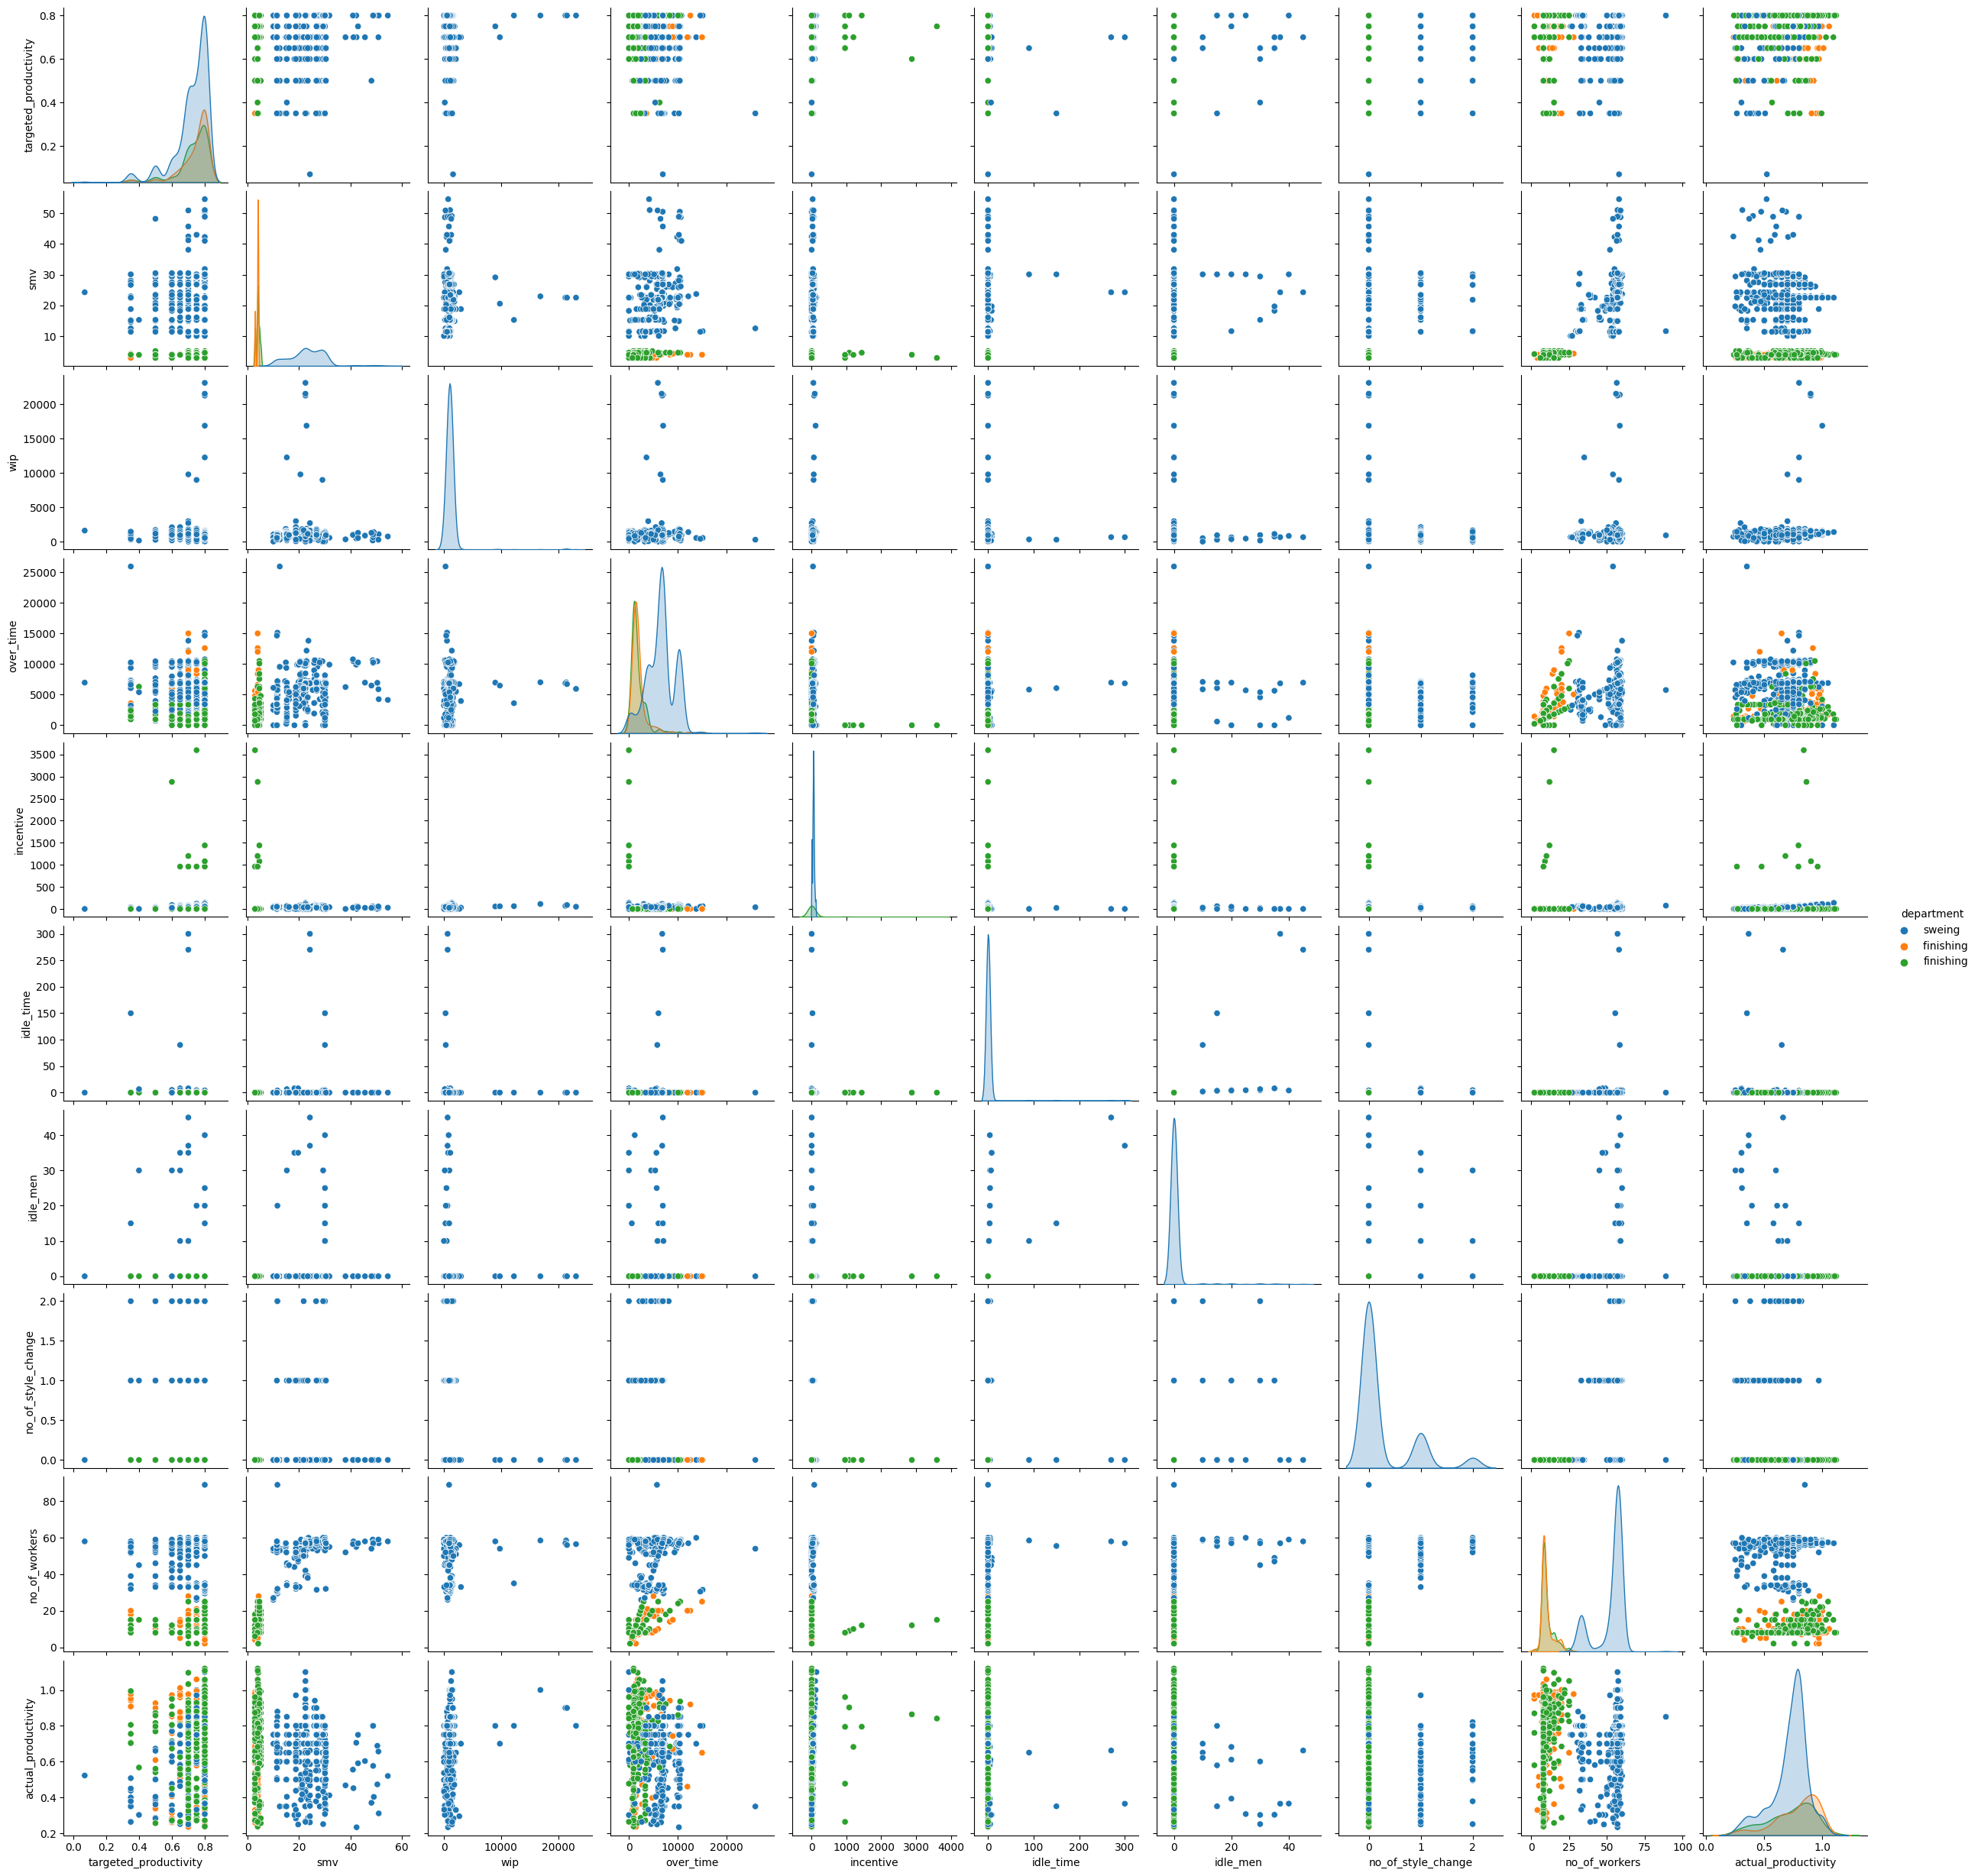

In [12]:
# Scatter Plot com Seaborn
# Esses dados serão mais explorados na próxima seção
sns.pairplot(workers,hue='department');

Nestes gráficos, percebemos que ainda é necessário um tratamento dos dados para tirarmos conclusões mais assertivas, como tratamento dos dados categóricos. Detalhe que para esse elevado número de atributos numéricos, é necessário realizar diversas montagens dos dados, filtrando pelos atributos categóricos.

#4. Pré-Processamento de dados



##4.1. Tratamento de Missings e Limpeza

In [13]:
# verificando nulls no dataset
workers.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Foi identificado que a coluna **wip** possui 506 valores nulos

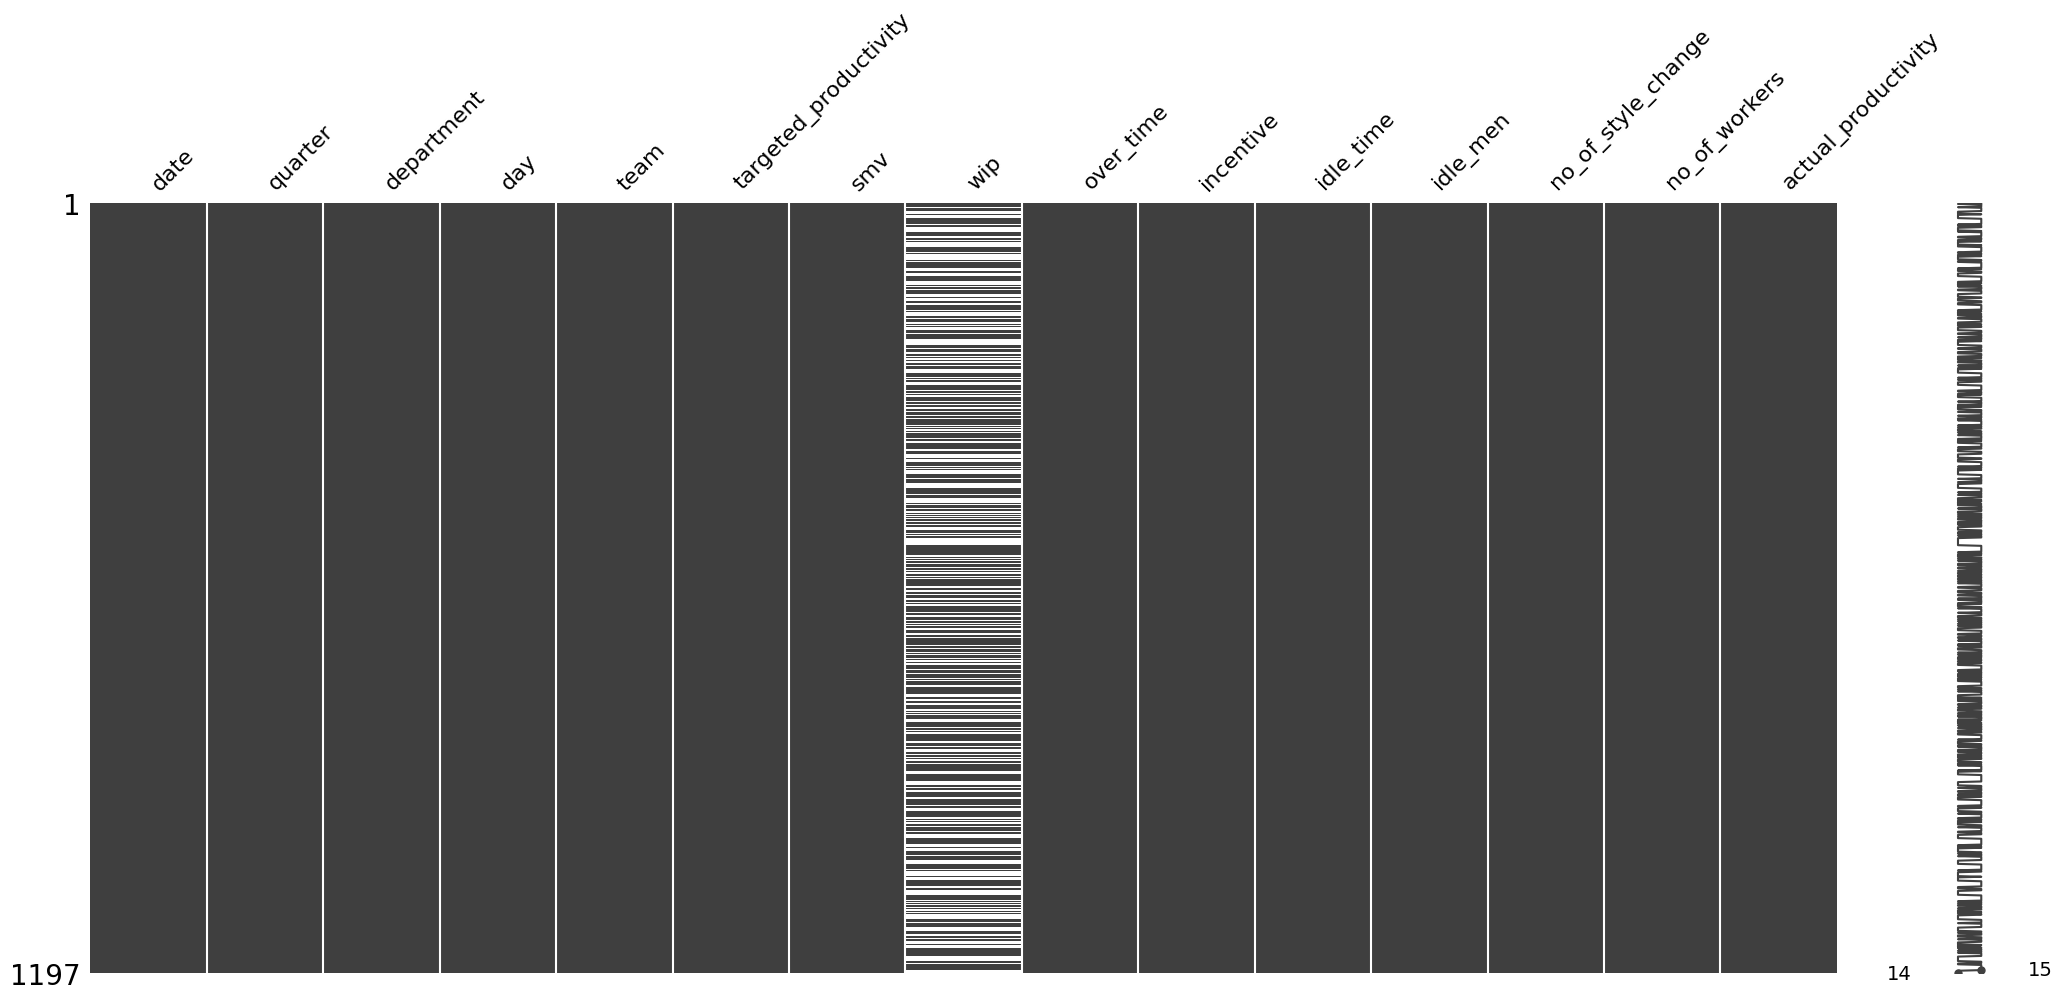

In [14]:
# salvando um NOVO dataset para tratamento de missings

# recuperando os nomes das colunas
colunas = list(workers.columns)

# o novo dataset irá conter todas as colunas
dataset = workers.copy()

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset);

Como por definição a coluna **'wip'** é o número de itens faltantes e como pelos dados estatísticos básico o menor valor é 7, a ausência de valores significa que tem 0 itens faltantes. Desta forma, vamos substituir o **NaN** por **zeros**.

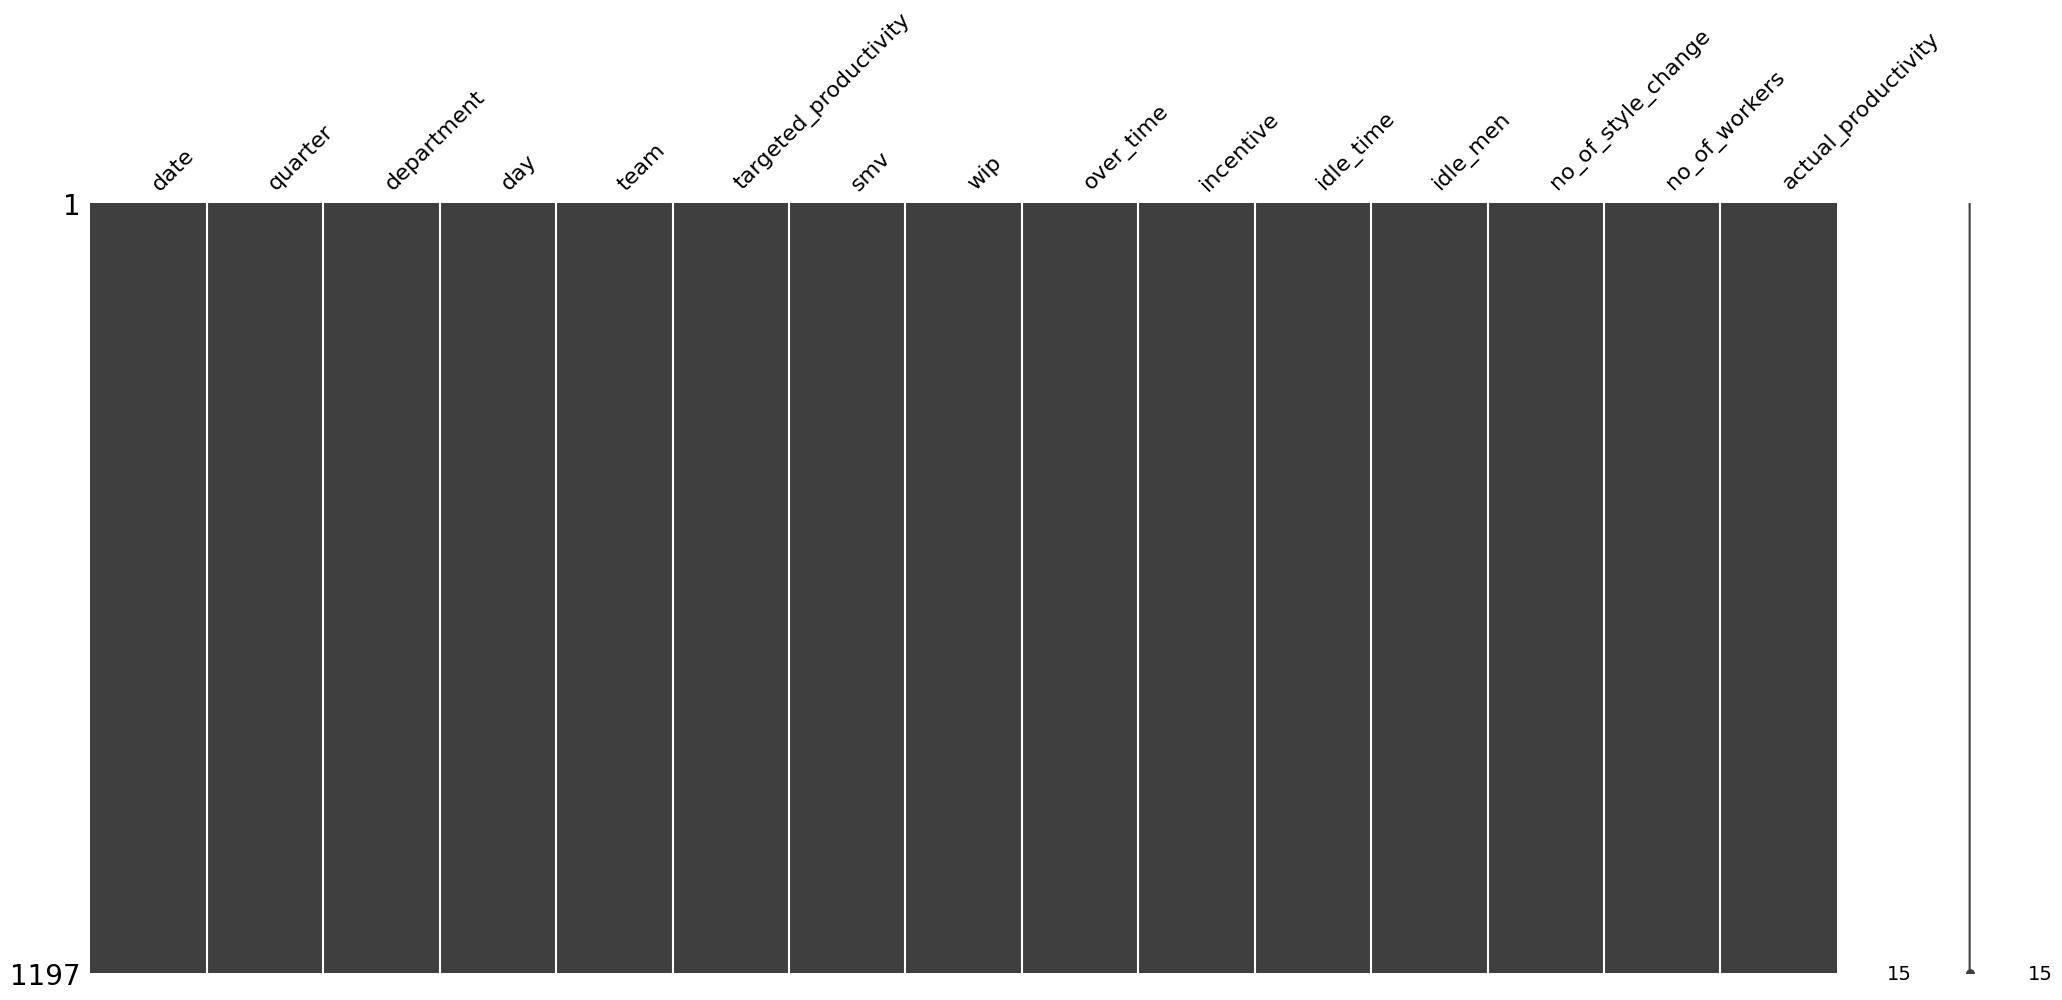

In [15]:
# substituindo os NaN de 'wip' por 0
dataset['wip'].fillna(0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset);

Outra análise que iremos realizar é sobre os atributos categóricos do dataset que são descritos nas colunas **quarter**, **department**, **day**, **team** e **no_of_style_change**

In [16]:
print(dataset.nunique(axis=0))
print('\nColuna quarter')
print(dataset.quarter.unique())
print('\nColuna department')
print(dataset.department.unique())
print('\nColuna day')
print(dataset.day.unique())
print('\nColuna team')
print(np.sort(dataset.team.unique()))
print('\nColuna no_of_style_change')
print(np.sort(dataset.no_of_style_change.unique()))

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      549
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

Coluna quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

Coluna department
['sweing' 'finishing ' 'finishing']

Coluna day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

Coluna team
['1' '10' '11' '12' '2' '3' '4' '5' '6' '7' '8' '9']

Coluna no_of_style_change
[0 1 2]


Como podemos perceber, precisamos corrigir o valor duplicado na coluna **'department'** ('finishing ' e 'finishing'), retirando o espaço desnecessário. A coluna **no_of_style_change** pode ser reclassificada como atributo categórico ao invés de numérica, desta forma, devemos alterar o tipo de dado, como já foi feito com a coluna **team**. Outro fato interessante, é que não existe registro para a sexta-feira (Friday), que pode ser a folga semanal da empresa.

In [17]:
# Removendo espaços desnecessários nas strings - remover espaços à esquerda e à direita
dataset['department']=dataset['department'].str.strip()

# Corrigir a gravia da categoria department de sweing para sewing:
dataset['department'] = dataset['department'].replace({'sweing':'sewing'})
print(dataset.department.unique()) # verificação da mudança na categoria

['sewing' 'finishing']


In [18]:
# Mudança do tipo de dados da coluna no_of_style_change
dataset['no_of_style_change']=dataset['no_of_style_change'].astype('str')

In [19]:
# Conferir de todas as mudanças foram realizadas
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   object        
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   object        
 13  no_

##4.2. Tratamento de *Outliers*

Vamos utilizar o método do boxplot para identificação e eliminação de *outliers*. Vamos utilizar a aplicação única e direta no atributo desejado, no entanto esta técnica pode precisar de um processo iterativo para convergência e remoção de todos os *outliers* se necessário.

In [20]:
def retirar_outliers(dados,coluna):
  """
  Função para retirar os outliers conforme método boxplot de colunas simples
  q1: primeiro quartil
  q3: terceiro quartil
  iqr: diferença entre o terceiro e o primeiro quartil, que representa
    50% dos dados da distribuição
  limite_inferior: primeiro quartil menos 1,5 IQR
  limite_superior: terceiro quartil mais 1,5*IQR

  Args:
        dados (dataframe): dataframe do qual deve ser feita a remoção de outliers
        coluna (string): nome da coluna do dataframe

    Returns:
        dados_sem_outliers (dataframe): dataframe com os outliers da coluna selecionada removidos
  """
  q1=dados[coluna].quantile(0.25)
  q3=dados[coluna].quantile(0.75)
  iqr=q3-q1
  limite_inferior=q1-1.5*iqr
  if limite_inferior<dados[coluna].min():
    limite_inferior=dados[coluna].min()
  limite_superior=q3+1.5*iqr
  if limite_superior>dados[coluna].max():
    limite_superior=dados[coluna].max()
  dados_sem_outliers=dados[(dados[coluna]>=limite_inferior) & (dados[coluna]<=limite_superior)]
  return dados_sem_outliers

Criada função *retirar_outliers* para automatizar o processo de retirada de *outliers* através do método de boxplot com a coluna desejada como entrada. Para alguns casos, são retirados os zeros para avaliar possíveis distorções da distribuição dos dados.

Dataset Original: 1197
Dataset sem outliers: 1188
Dataset sem outliers e sem zeros: 669


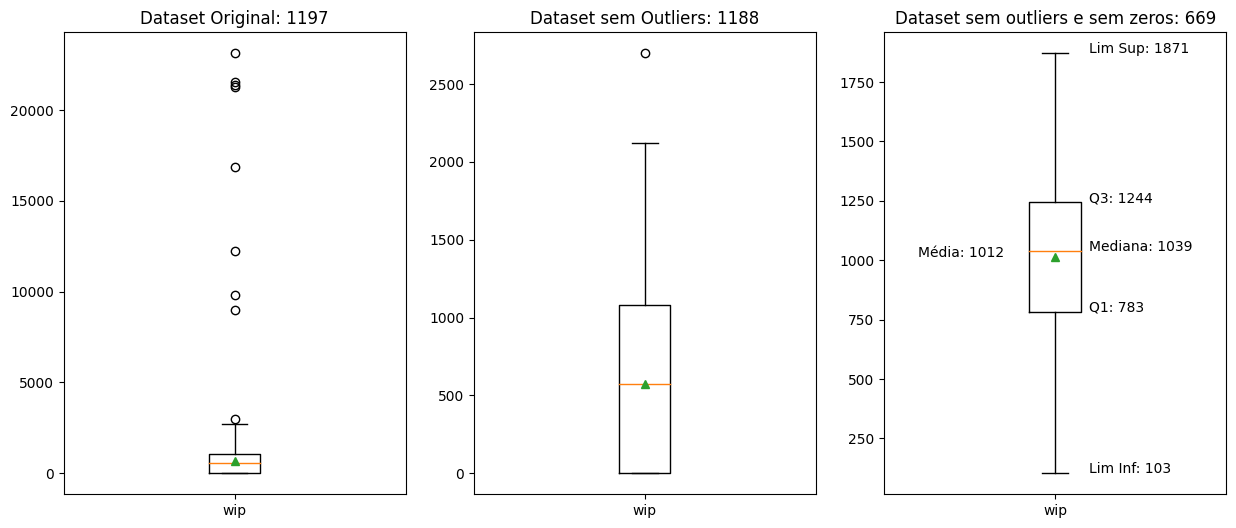

In [21]:
# Retirar os outliers da coluna wip
# seleciona a coluna
coluna='wip'

# utiliza a função retirar_outliers usando o argumento do dataset e a coluna selecionada
dataset_wip_sem_outliers=retirar_outliers(dataset,coluna)

# utiliza a função retirar_outliers usando o argumento do dataset filtrado sem os zeros e a coluna selecionada
dataset_wip_sem_outliers_zeros=retirar_outliers(dataset[dataset[coluna]>0],coluna)
dados_coluna=dataset_wip_sem_outliers_zeros[coluna]

# cria 3 subplots: Dataset Original, Dataset sem Outliers e Dataset sem Outliers e sem Zeros
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(15,6))

# plota o boxplot no primeiro gráfico - detalhe que a média foi incluida
axes[0].boxplot(dataset[coluna], showmeans=True);
axes[0].set_title('Dataset Original: '+str(dataset[coluna].count()));
axes[0].set_xticklabels([coluna]);

# plota o boxplot no segundo gráfico - detalhe que a média foi incluida
axes[1].boxplot(dataset_wip_sem_outliers[coluna], showmeans=True);
axes[1].set_title('Dataset sem Outliers: '+str(dataset_wip_sem_outliers[coluna].count()));
axes[1].set_xticklabels([coluna]);

# plota o boxplot no terceiro gráfico - detalhe que a média foi incluida
axes[2].boxplot(dataset_wip_sem_outliers_zeros[coluna], showmeans=True);
axes[2].set_xticklabels([coluna]);
axes[2].set_title("Dataset sem outliers e sem zeros: "+str(dados_coluna.count()));
axes[2].text(1.1,dados_coluna.max()*1.,'Lim Sup: %1.f'% dados_coluna.max())
axes[2].text(1.1,dados_coluna.quantile(0.75),'Q3: %1.f'% dados_coluna.quantile(0.75))
axes[2].text(1.1,dados_coluna.quantile(0.5),'Mediana: %1.f'% dados_coluna.quantile(0.5))
axes[2].text(0.6,dados_coluna.mean()*1.,'Média: %1.f'% dados_coluna.mean())
axes[2].text(1.1,dados_coluna.quantile(0.25),'Q1: %1.f'% dados_coluna.quantile(0.25))
axes[2].text(1.1,dados_coluna.min()*1.,'Lim Inf: %1.f'% dados_coluna.min())

# Fazer a contagem de dados
print("Dataset Original: "+str(dataset[coluna].count()))
print("Dataset sem outliers: "+str(dataset_wip_sem_outliers[coluna].count()))
print("Dataset sem outliers e sem zeros: "+str(dataset_wip_sem_outliers_zeros[coluna].count()))

Para a coluna **wip** (o backlog dos itens) existem alguns dados que destoam significativamente do restante da amostra, que após primeira remoção de *outliers* ficou claro esta discrepância, que talvez sejam dados registrados de forma errada. O elevado número de zeros que foram inseridos na etapa anterior, também pesam na distribuição e após sua remoção fica claro que quando há backlog, eles ficam distribuidos entre 103 e 1871 itens.

Dataset Original: 1197
Dataset sem outliers: 1186
Dataset sem outliers e sem zeros: 559


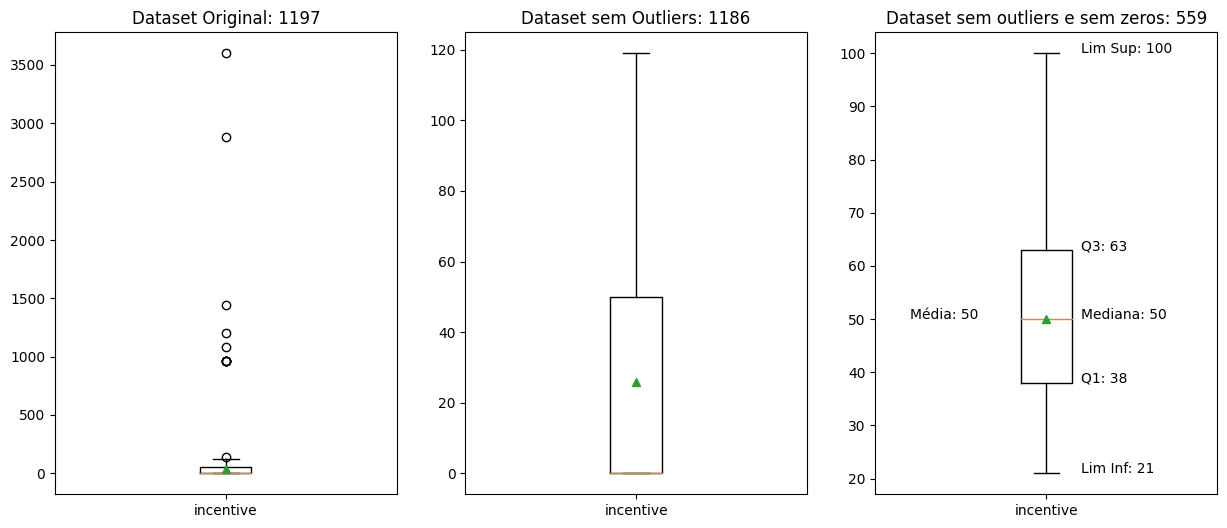

In [22]:
# Retirar os outliers da coluna incentive

# seleciona a coluna
coluna='incentive'

# utiliza a função retirar_outliers usando o argumento do dataset e a coluna selecionada
dataset_incentive_sem_outliers=retirar_outliers(dataset,coluna)

# utiliza a função retirar_outliers usando o argumento do dataset filtrado sem os zeros e a coluna selecionada
dataset_incentive_sem_outliers_zeros=retirar_outliers(dataset[dataset[coluna]>0],coluna)
dados_coluna=dataset_incentive_sem_outliers_zeros[coluna]

# cria 3 subplots: Dataset Original, Dataset sem Outliers e Dataset sem Outliers e sem Zeros
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(15,6))

# plota o boxplot no primeiro gráfico - detalhe que a média foi incluida
axes[0].boxplot(dataset[coluna], showmeans=True);
axes[0].set_title('Dataset Original: '+str(dataset[coluna].count()));
axes[0].set_xticklabels([coluna]);

# plota o boxplot no segundo gráfico - detalhe que a média foi incluida
axes[1].boxplot(dataset_incentive_sem_outliers[coluna], showmeans=True);
axes[1].set_title('Dataset sem Outliers: '+str(dataset_incentive_sem_outliers[coluna].count()));
axes[1].set_xticklabels([coluna]);

# plota o boxplot no terceiro gráfico - detalhe que a média foi incluida
axes[2].boxplot(dataset_incentive_sem_outliers_zeros[coluna], showmeans=True);
axes[2].set_xticklabels([coluna]);
axes[2].set_title("Dataset sem outliers e sem zeros: "+str(dados_coluna.count()));
axes[2].text(1.1,dados_coluna.max()*1.,'Lim Sup: %1.f'% dados_coluna.max())
axes[2].text(1.1,dados_coluna.quantile(0.75),'Q3: %1.f'% dados_coluna.quantile(0.75))
axes[2].text(1.1,dados_coluna.quantile(0.5),'Mediana: %1.f'% dados_coluna.quantile(0.5))
axes[2].text(0.6,dados_coluna.mean()*1.,'Média: %1.f'% dados_coluna.mean())
axes[2].text(1.1,dados_coluna.quantile(0.25),'Q1: %1.f'% dados_coluna.quantile(0.25))
axes[2].text(1.1,dados_coluna.min()*1.,'Lim Inf: %1.f'% dados_coluna.min())

print("Dataset Original: "+str(dataset[coluna].count()))
print("Dataset sem outliers: "+str(dataset_incentive_sem_outliers[coluna].count()))
print("Dataset sem outliers e sem zeros: "+str(dataset_incentive_sem_outliers_zeros[coluna].count()))

In [23]:
dataset_incentive_sem_outliers_zeros['incentive'].describe()

count    559.000000
mean      50.069767
std       17.754614
min       21.000000
25%       38.000000
50%       50.000000
75%       63.000000
max      100.000000
Name: incentive, dtype: float64

Da mesma forma que o item anterior, a coluna **incentive** apresenta alguns dados bem discrepantes e uma grande influência do zeros.

Dataset Original: 1197
Dataset sem outliers: 1179
Dataset sem outliers e sem zeros: 14


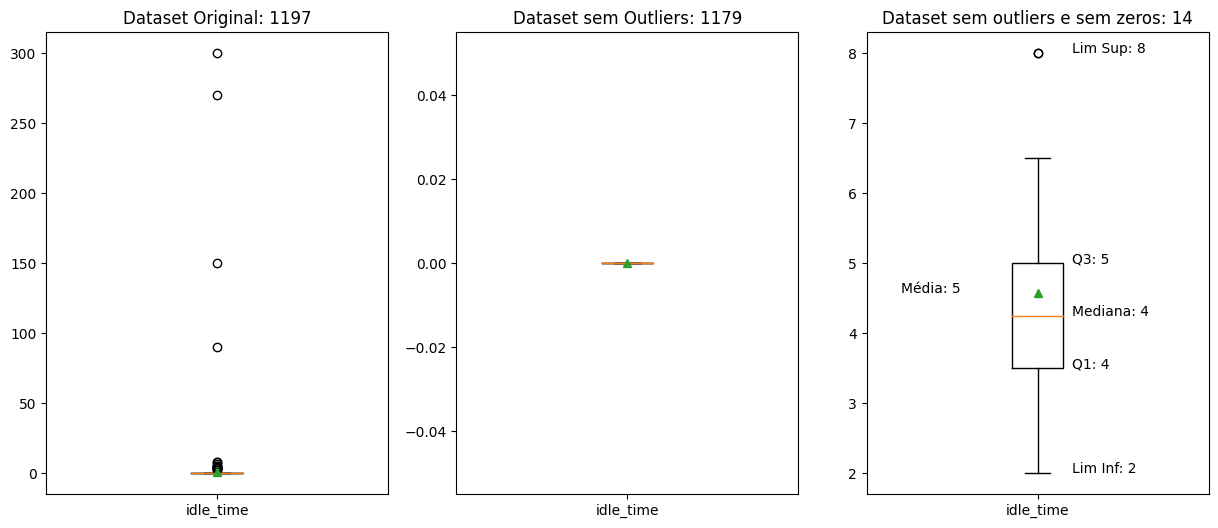

In [24]:
# Retirar os outliers da coluna idle_time

# seleciona a coluna
coluna='idle_time'

# utiliza a função retirar_outliers usando o argumento do dataset e a coluna selecionada
dataset_idle_time_sem_outliers=retirar_outliers(dataset,coluna)

# utiliza a função retirar_outliers usando o argumento do dataset filtrado sem os zeros e a coluna selecionada
dataset_idle_time_sem_outliers_zeros=retirar_outliers(dataset[dataset[coluna]>0],coluna)
dados_coluna=dataset_idle_time_sem_outliers_zeros[coluna]

# cria 3 subplots: Dataset Original, Dataset sem Outliers e Dataset sem Outliers e sem Zeros
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(15,6))

# plota o boxplot no primeiro gráfico - detalhe que a média foi incluida
axes[0].boxplot(dataset[coluna], showmeans=True);
axes[0].set_title('Dataset Original: '+str(dataset[coluna].count()));
axes[0].set_xticklabels([coluna]);

# plota o boxplot no segundo gráfico - detalhe que a média foi incluida
axes[1].boxplot(dataset_idle_time_sem_outliers[coluna], showmeans=True);
axes[1].set_title('Dataset sem Outliers: '+str(dataset_idle_time_sem_outliers[coluna].count()));
axes[1].set_xticklabels([coluna]);

# plota o boxplot no terceiro gráfico - detalhe que a média foi incluida
axes[2].boxplot(dataset_idle_time_sem_outliers_zeros[coluna], showmeans=True);
axes[2].set_xticklabels([coluna]);
axes[2].set_title("Dataset sem outliers e sem zeros: "+str(dados_coluna.count()));
axes[2].text(1.1,dados_coluna.max()*1.,'Lim Sup: %1.f'% dados_coluna.max())
axes[2].text(1.1,dados_coluna.quantile(0.75),'Q3: %1.f'% dados_coluna.quantile(0.75))
axes[2].text(1.1,dados_coluna.quantile(0.5),'Mediana: %1.f'% dados_coluna.quantile(0.5))
axes[2].text(0.6,dados_coluna.mean()*1.,'Média: %1.f'% dados_coluna.mean())
axes[2].text(1.1,dados_coluna.quantile(0.25),'Q1: %1.f'% dados_coluna.quantile(0.25))
axes[2].text(1.1,dados_coluna.min()*1.,'Lim Inf: %1.f'% dados_coluna.min())

print("Dataset Original: "+str(dataset[coluna].count()))
print("Dataset sem outliers: "+str(dataset_idle_time_sem_outliers[coluna].count()))
print("Dataset sem outliers e sem zeros: "+str(dataset_idle_time_sem_outliers_zeros[coluna].count()))

In [25]:
dataset_idle_time_sem_outliers_zeros['idle_time'].describe()

count    14.000000
mean      4.571429
std       1.859044
min       2.000000
25%       3.500000
50%       4.250000
75%       5.000000
max       8.000000
Name: idle_time, dtype: float64

A coluna **idle_time**, assim como a **idle_men** (que apresentam uma boa correlação entre si), tem o maior registro de zeros que quando eliminados podemos visualizar melhor a distribuição de dados.

Dataset Original: 1197
Dataset sem outliers: 1179
Dataset sem outliers e sem zeros: 18


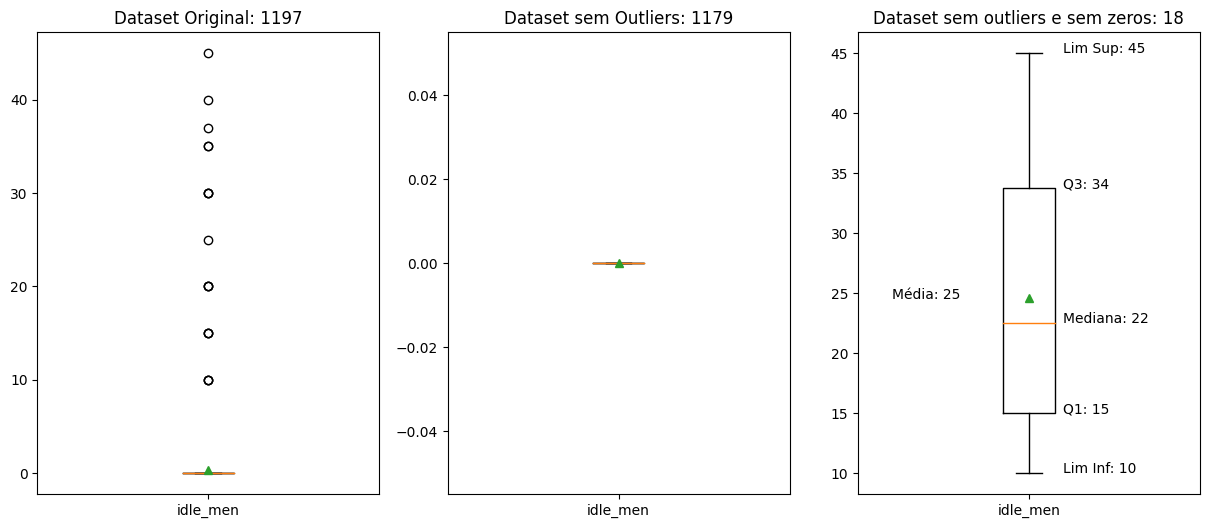

In [26]:
# Retirar os outliers da coluna idle_time

# seleciona a coluna
coluna='idle_men'

# utiliza a função retirar_outliers usando o argumento do dataset e a coluna selecionada
dataset_idle_men_sem_outliers=retirar_outliers(dataset,coluna)

# utiliza a função retirar_outliers usando o argumento do dataset filtrado sem os zeros e a coluna selecionada
dataset_idle_men_sem_outliers_zeros=retirar_outliers(dataset[dataset[coluna]>0],coluna)
dados_coluna=dataset_idle_men_sem_outliers_zeros[coluna]
# cria 3 subplots: Dataset Original, Dataset sem Outliers e Dataset sem Outliers e sem Zeros
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(15,6))

# plota o boxplot no primeiro gráfico - detalhe que a média foi incluida
axes[0].boxplot(dataset[coluna], showmeans=True);
axes[0].set_title('Dataset Original: '+str(dataset[coluna].count()));
axes[0].set_xticklabels([coluna]);

# plota o boxplot no segundo gráfico - detalhe que a média foi incluida
axes[1].boxplot(dataset_idle_men_sem_outliers[coluna], showmeans=True);
axes[1].set_title('Dataset sem Outliers: '+str(dataset_idle_men_sem_outliers[coluna].count()));
axes[1].set_xticklabels([coluna]);

# plota o boxplot no terceiro gráfico - detalhe que a média foi incluida
axes[2].boxplot(dataset_idle_men_sem_outliers_zeros[coluna], showmeans=True);
axes[2].set_xticklabels([coluna]);
axes[2].set_title("Dataset sem outliers e sem zeros: "+str(dados_coluna.count()));
axes[2].text(1.1,dados_coluna.max()*1.,'Lim Sup: %1.f'% dados_coluna.max())
axes[2].text(1.1,dados_coluna.quantile(0.75),'Q3: %1.f'% dados_coluna.quantile(0.75))
axes[2].text(1.1,dados_coluna.quantile(0.5),'Mediana: %1.f'% dados_coluna.quantile(0.5))
axes[2].text(0.6,dados_coluna.mean()*1.,'Média: %1.f'% dados_coluna.mean())
axes[2].text(1.1,dados_coluna.quantile(0.25),'Q1: %1.f'% dados_coluna.quantile(0.25))
axes[2].text(1.1,dados_coluna.min()*1.,'Lim Inf: %1.f'% dados_coluna.min())

print("Dataset Original: "+str(dataset[coluna].count()))
print("Dataset sem outliers: "+str(dataset_idle_men_sem_outliers[coluna].count()))
print("Dataset sem outliers e sem zeros: "+str(dataset_idle_men_sem_outliers_zeros[coluna].count()))

In [27]:
dataset_idle_men_sem_outliers_zeros[coluna].describe()

count    18.000000
mean     24.555556
std      11.089063
min      10.000000
25%      15.000000
50%      22.500000
75%      33.750000
max      45.000000
Name: idle_men, dtype: float64

Detalhe que a quantidade de trabalhores impactados nas interrupções indevidas já apresentam uma distribuição sem distorções somente removendo os zeros do dataset, além dos *outliers*.

##4.3. Verificação dos atributos categóricos
Nesta seção será avaliada a distribuição dos dados por cada atributo categórico: **no_of_style_change**, **department**, **team**, **day** e **quarter**.

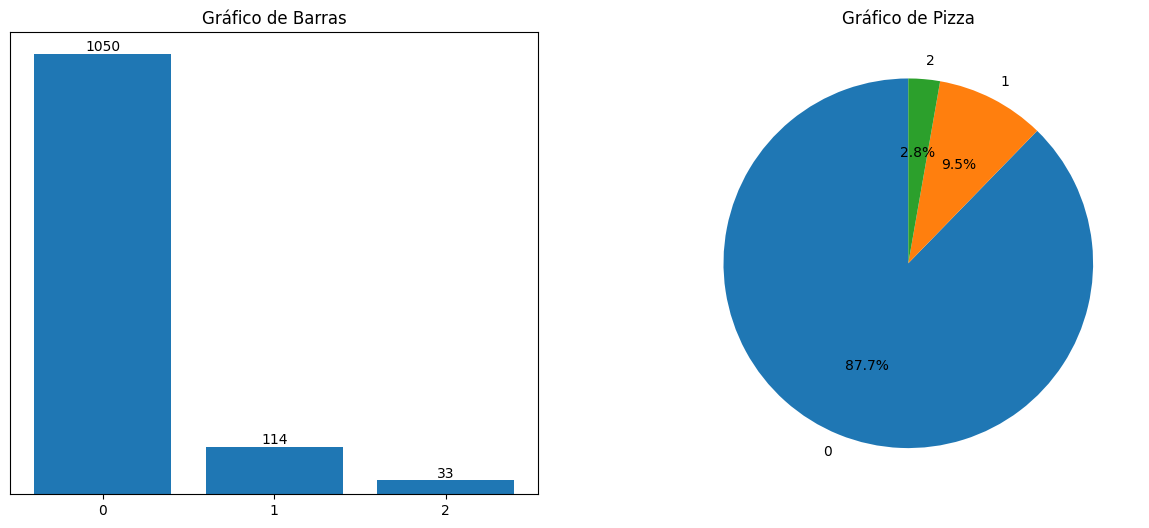

In [28]:
# Para a coluna no_of_style_change, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('no_of_style_change')['no_of_style_change'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(x,y);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no Gráfico de Barras (primeiro subplot)
for i, v in enumerate(y):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y, labels=x, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

plt.show()

Verificamos que para a coluna **no_of_style_change** há um grande acumulo registro com nenhuma mudança de escopo.

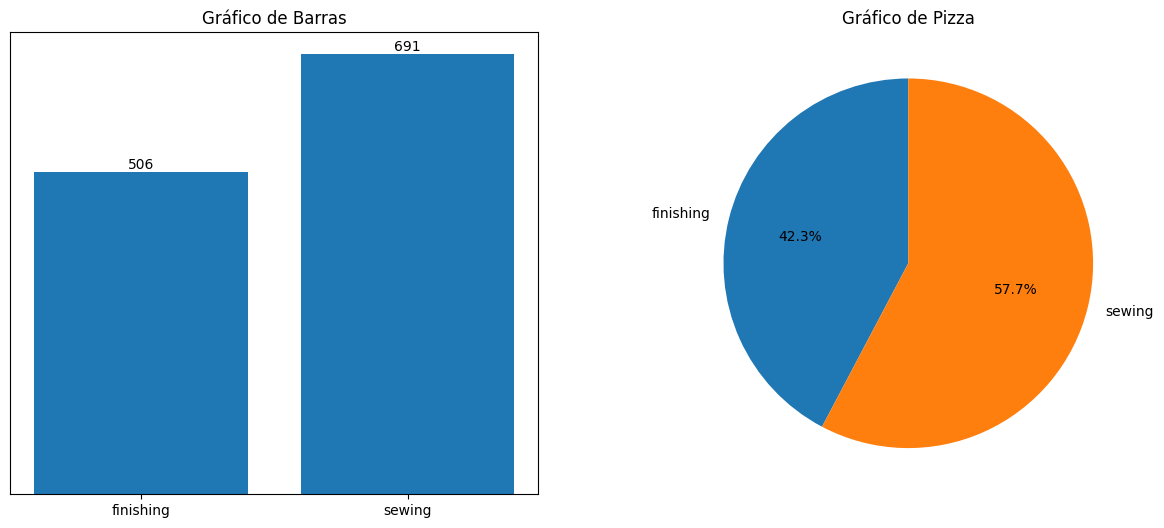

In [29]:
# Para a coluna department, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('department')['department'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(x,y);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no Gráfico de Barras (primeiro subplot)
for i, v in enumerate(y):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y, labels=x, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

plt.show()

Para a coluna **department** a quantidade de registro começa a ficar bem distribuido.

       quantidade_demandas
count             12.00000
mean              99.75000
std                6.73019
min               88.00000
25%               94.75000
50%               99.50000
75%              105.00000
max              109.00000


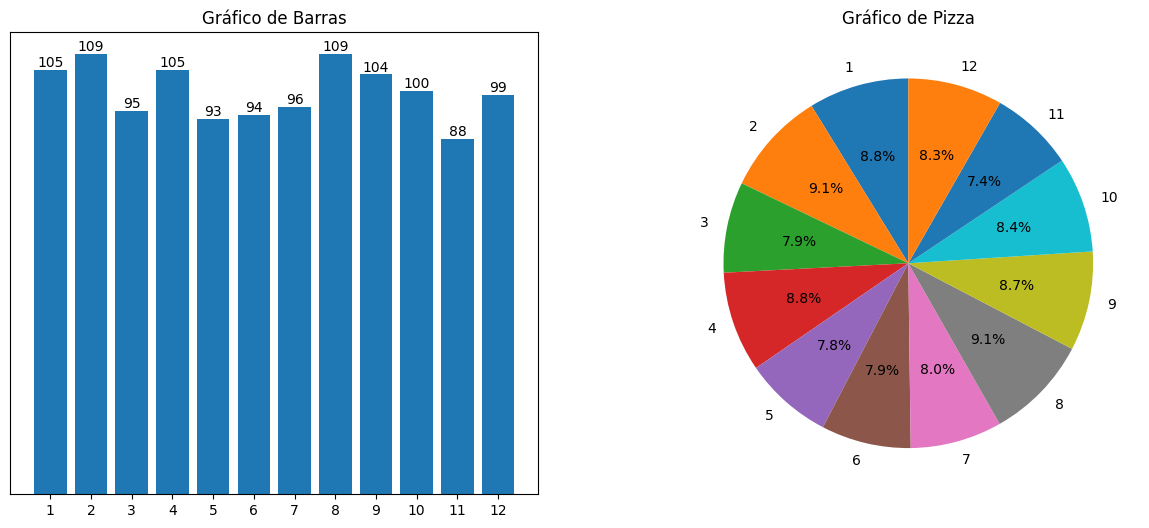

In [30]:
# Para a coluna team, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('team')['team'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Ordem para os dados referentes às Equipes (team)
order=['1','2','3','4','5','6', '7', '8', '9', '10', '11', '12']

# y reordenado conforme item anterior
y_order=y[[x.tolist().index(order[i]) for i in range(len(x))]]

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(order,y_order);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no Gráfico de Barras (primeiro subplot)
for i, v in enumerate(y_order):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y_order, labels=order, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

print(pd.DataFrame(y,columns=['quantidade_demandas']).describe())

plt.show()

Existe uma distribuição da quantidade de registro por Equipe (coluna **team**) uniforme, demonstrando que talvez exista uma boa distribuição de demandas por equipe.

       quantidade_demandas
count             6.000000
mean            199.500000
std               6.978539
min             187.000000
25%             199.000000
50%             200.000000
75%             202.500000
max             208.000000


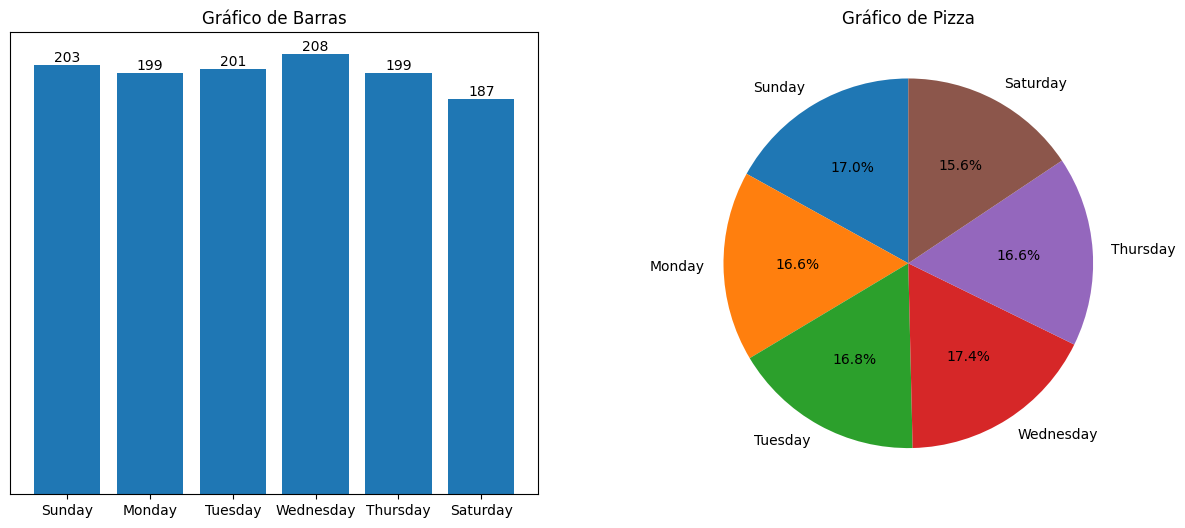

In [31]:
# Para a coluna day, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('day')['day'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Ordem para os dados referentes aos dias da semana
order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Saturday']

# y reordenado conforme item anterior
y_order=y[[x.tolist().index(order[i]) for i in range(len(x))]]

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(order,y_order);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no primeiro subplot
for i, v in enumerate(y_order):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y_order, labels=order, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

print(pd.DataFrame(y,columns=['quantidade_demandas']).describe())

plt.show()

Da mesma forma, para a coluna **day** também tem os registro bem distribuídos. Detalhe para a ausência de registro para *Friday*, como já havia destacado antes.

       quantidade_demandas
count             5.000000
mean            239.400000
std             125.302833
min              44.000000
25%             210.000000
50%             248.000000
75%             335.000000
max             360.000000


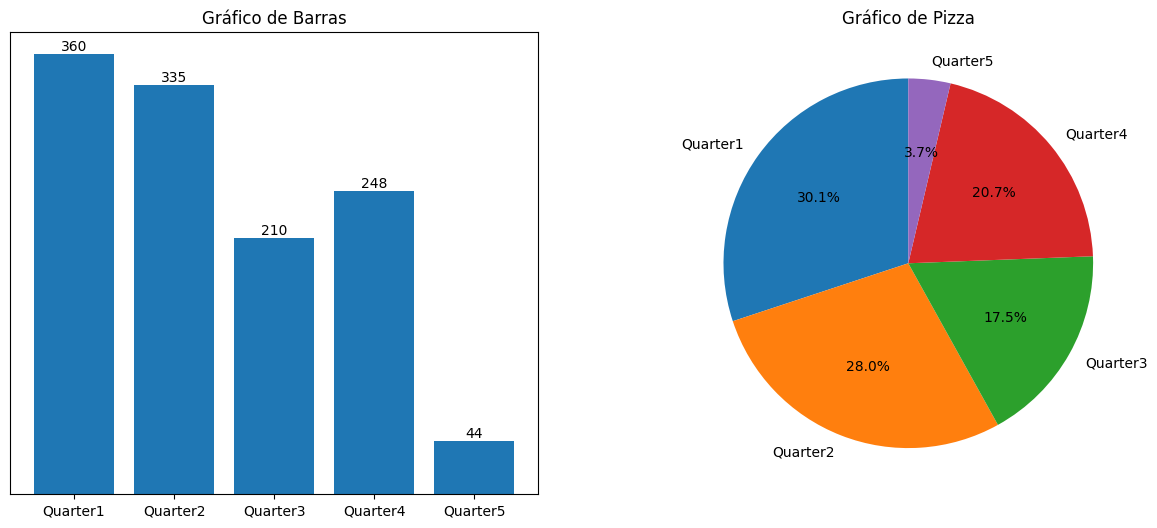

In [32]:
# Para a coluna quarter, fez mais sentido em utilizar os valores como
# classes e contabilizar a quantidade destes dados no dataset
dataset_style_change=dataset.groupby('quarter')['quarter'].count()
x=dataset_style_change.index
y=dataset_style_change.values

# Criação de Subplots
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,6))

# Plotagem do Gráfico de Barras na posição 1
axes[0].bar(x,y);
axes[0].set_title('Gráfico de Barras')
axes[0].set_yticks([])

# Adicionando rótulos de dados no primeiro subplot
for i, v in enumerate(y):
    axes[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Plotagem do Gráfico de Pizza na posição 2
axes[1].pie(y, labels=x, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Gráfico de Pizza')

print(pd.DataFrame(y,columns=['quantidade_demandas']).describe())

plt.show()

Para a coluna **quarter**, a distribuição dos registro não é uniforme. Isso se deve ao fato que nem todos meses possuem 5 semanas (menor concentração no *Quarter5*) e como os dados terminam no dia 11 do mês de março, há uma tendência de concentração maior nos *Quarter1* e *Quarter2*.

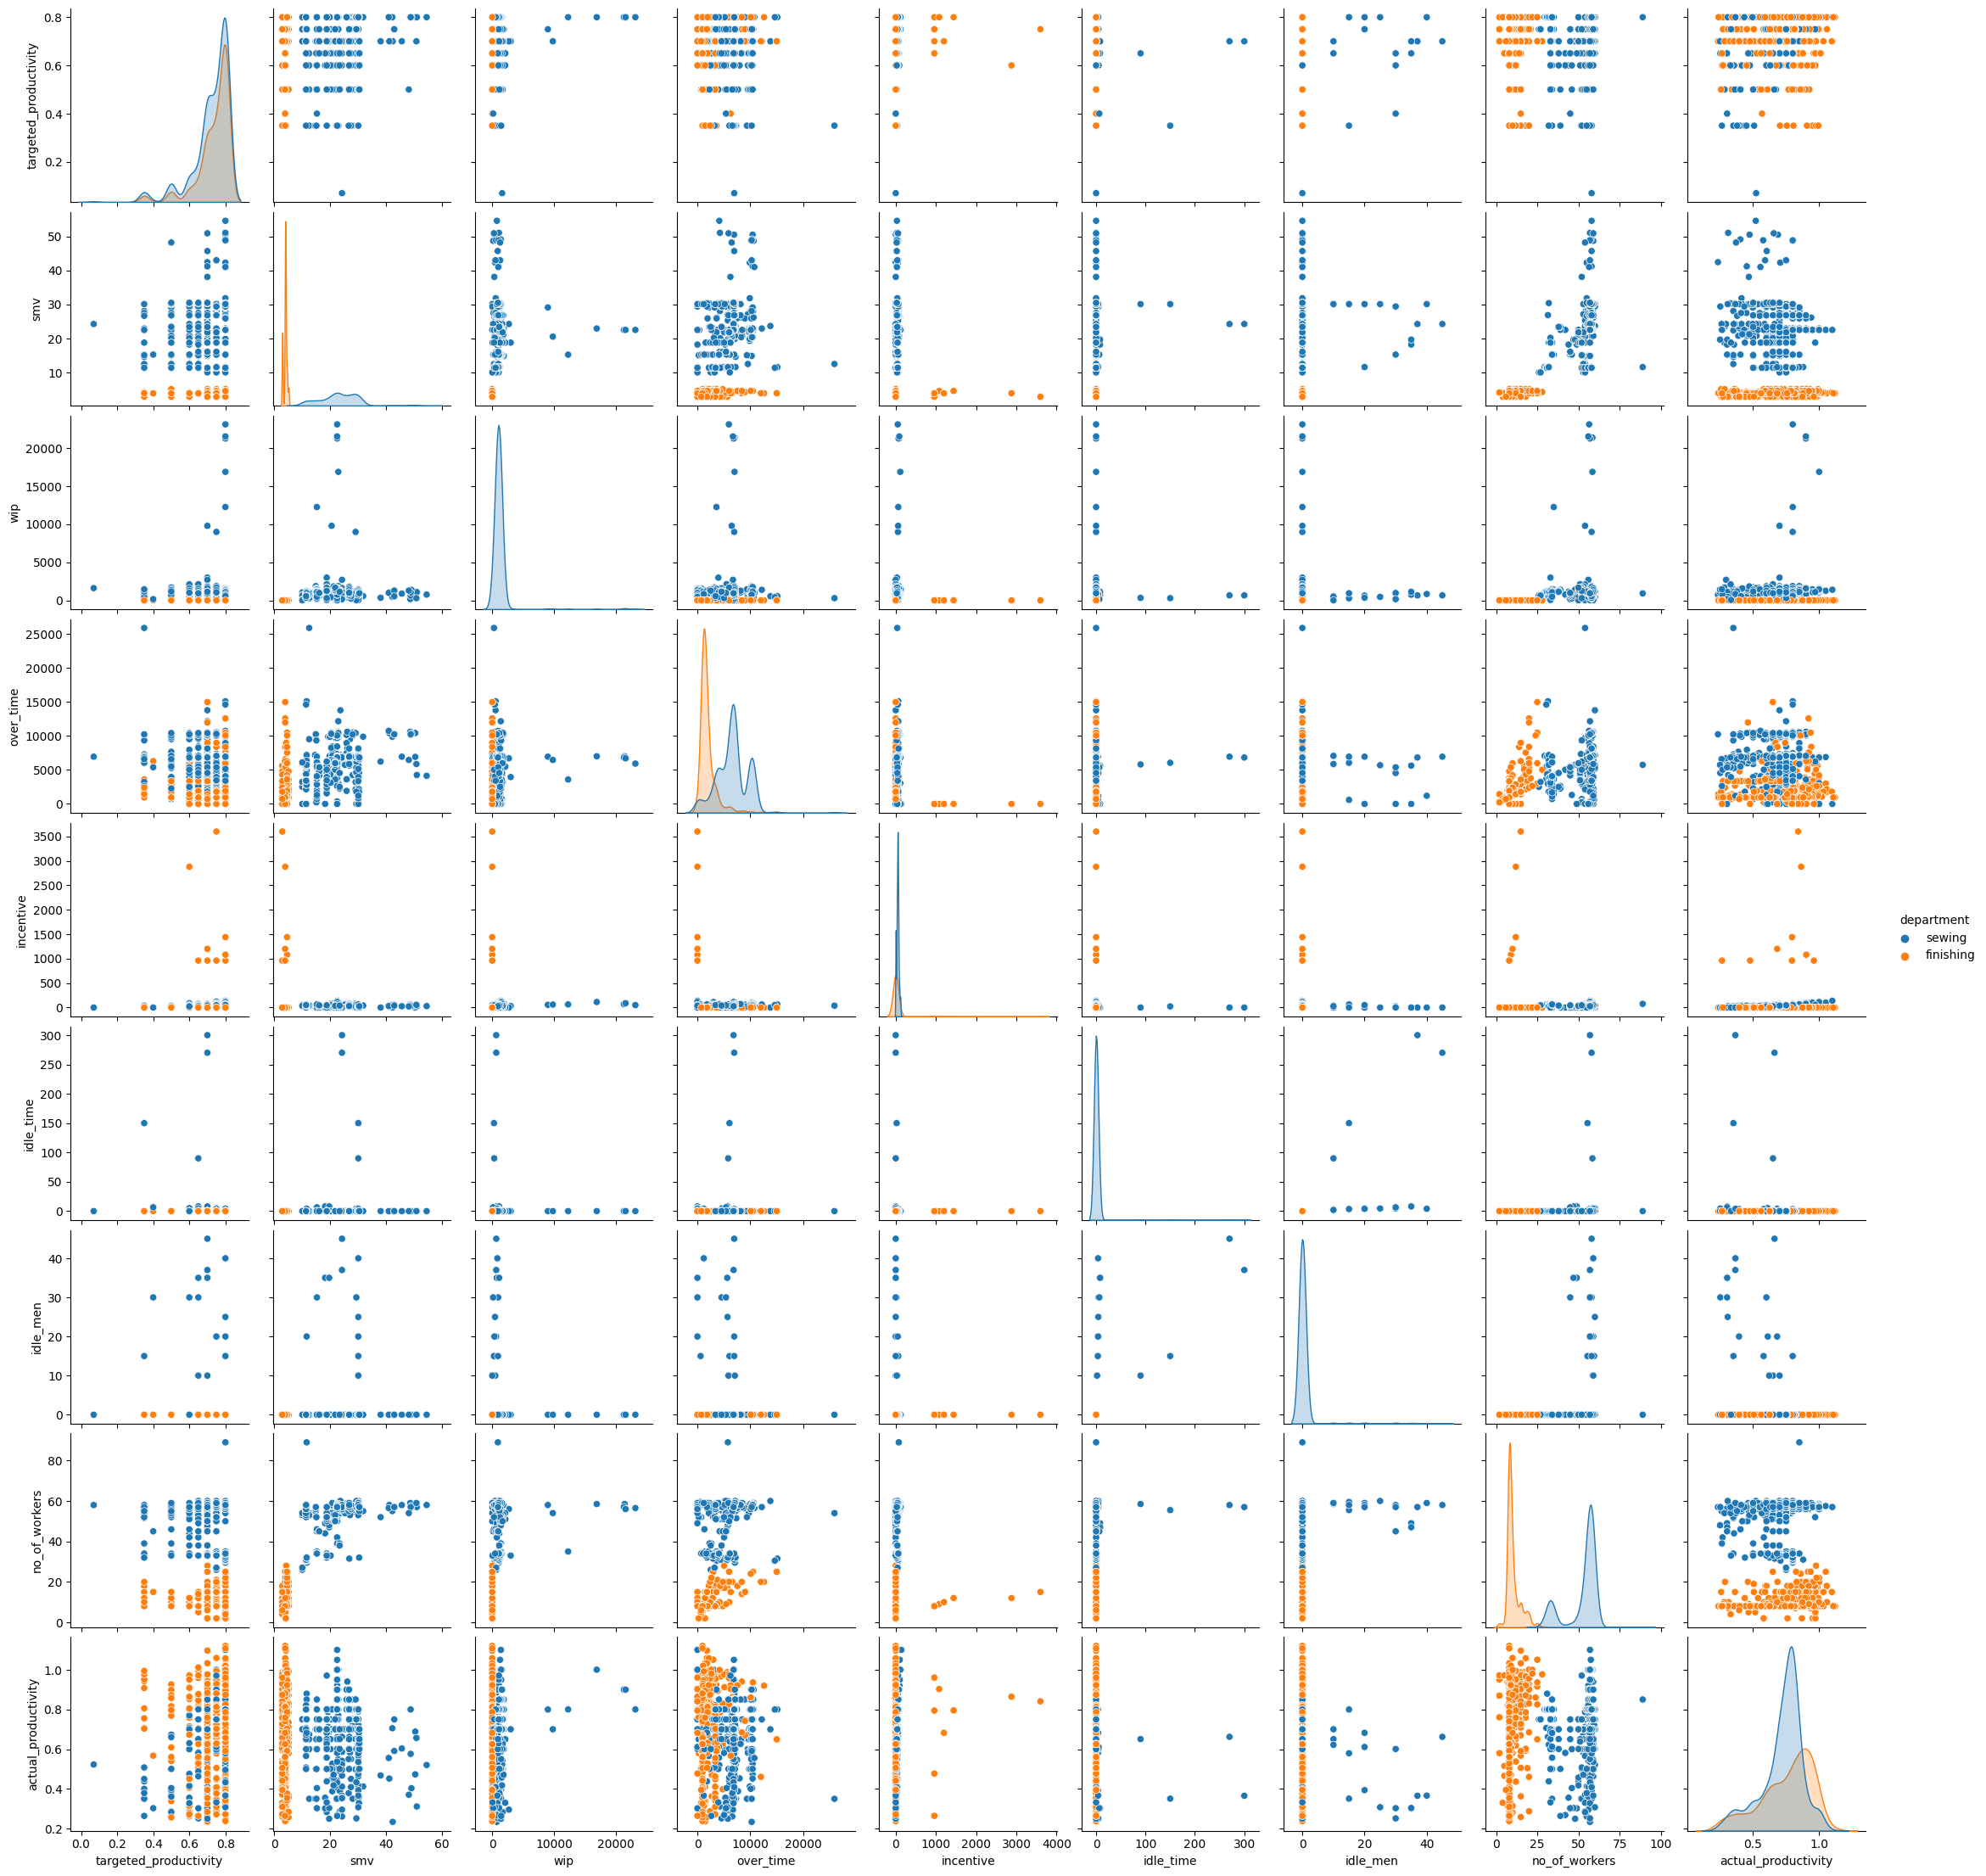

In [33]:
sns.pairplot(dataset,hue='department');

Como podemos perceber, existe um comportamento diferente dos dados para cada tipo de departamento, tais como para o departamento de acabamento (*finishing*), temos o menor número de trabalhadores (*no_of_workers*), maior produtividade (*actual_productivity*), maior incentivo (*incentive*), menor número de horas extras (*over_time*), menor tempo alocado por tarefa (*smv*), menor backlog (*wip*).

A seguir, demonstramos em particular a distribuição do número de trabalhadores por departamento com **boxplot**.

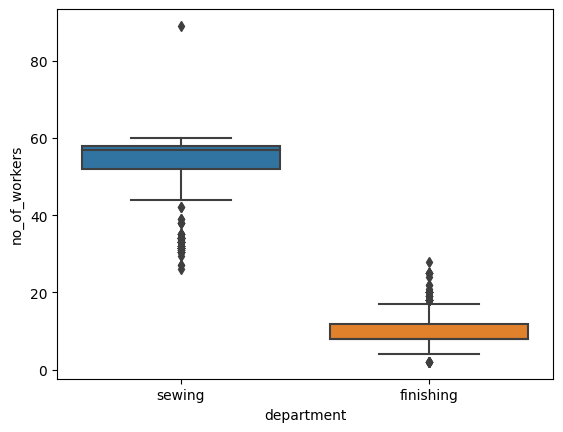

In [34]:
# Distribuição do número de trabalhadores (no_of_workers) por departamento (department)
sns.boxplot(data=dataset,x='department',y='no_of_workers');

Como podemos percerber, a distribuição de número de trabalhadores é diferente por departamento: sewing (costura) necessita de maior número (entre 40 e 60 trabalhores) e finishing (acabamento) (menos de 20 trabalhores).

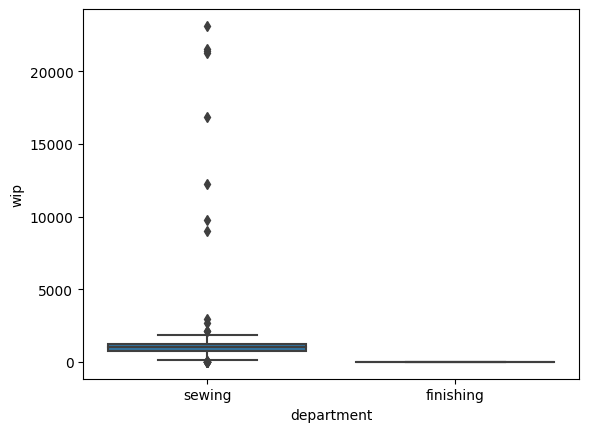

In [35]:
# Distribuição do Backlog (wip) por departamento (department)
sns.boxplot(data=dataset,x='department',y='wip');

Mesmo assim, a departamento de costura apresenta o maior backlog (itens faltantes - **wip**)

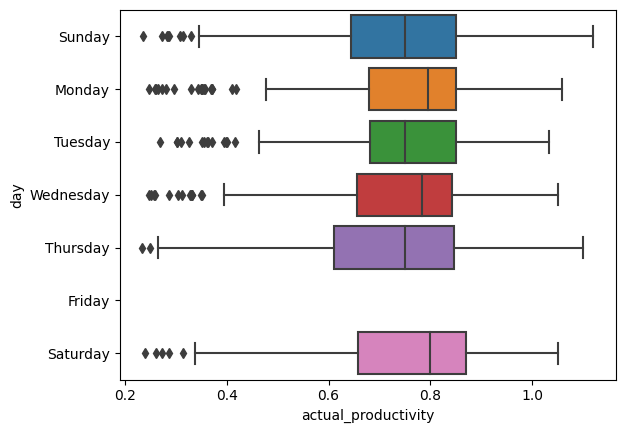

In [36]:
# Análise da produtividade atual por dia da semana
sns.boxplot(data=dataset,y='day',x='actual_productivity',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], orient='h');

O resultado da produtividade não se altera significativamente por dia da semana: a caixa do boxplot entre 0.65 e 0.85, aproximadamente.

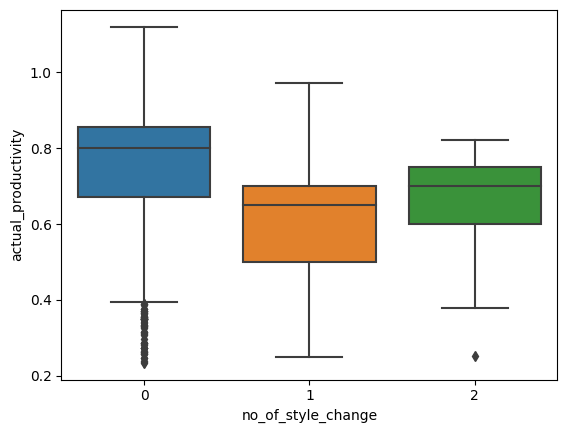

In [37]:
# Análise da distribuição da produtividade atual por número de mudanças de estilo
sns.boxplot(data=dataset,x='no_of_style_change',y='actual_productivity');

Os dados tem valores maiores para a distribuição da produtividade não tem mudança de estilo.

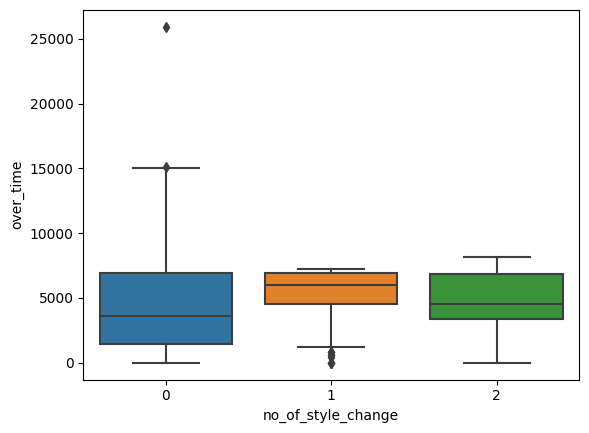

In [38]:
# Análise da Distribuição das horas extras (over_time) por mudança de estilo
sns.boxplot(data=dataset,x='no_of_style_change',y='over_time');

O terceiro quartil do registro de horas extras não depende no número de mudanças de estilo.

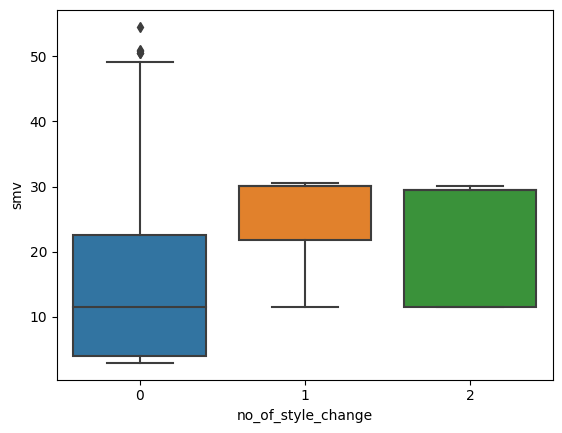

In [39]:
# Análise do tempo alocado para a tarefa (smv) por mudança de estilo
sns.boxplot(data=dataset,x='no_of_style_change',y='smv');

O tempo alocado para realização das tarefas é menor quando não tem mudança de estilo.

##4.4 Separação em conjunto de treino e conjunto de teste

In [40]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = dataset.iloc[:,0:14]#['date','department','team','no_of_style_change','day']
Y = dataset.loc[:,['actual_productivity']]

In [41]:
X

date   quarter department        day team  targeted_productivity  \
0    2015-01-01  Quarter1     sewing   Thursday    8                   0.80   
1    2015-01-01  Quarter1  finishing   Thursday    1                   0.75   
2    2015-01-01  Quarter1     sewing   Thursday   11                   0.80   
3    2015-01-01  Quarter1     sewing   Thursday   12                   0.80   
4    2015-01-01  Quarter1     sewing   Thursday    6                   0.80   
...         ...       ...        ...        ...  ...                    ...   
1192 2015-03-11  Quarter2  finishing  Wednesday   10                   0.75   
1193 2015-03-11  Quarter2  finishing  Wednesday    8                   0.70   
1194 2015-03-11  Quarter2  finishing  Wednesday    7                   0.65   
1195 2015-03-11  Quarter2  finishing  Wednesday    9                   0.75   
1196 2015-03-11  Quarter2  finishing  Wednesday    6                   0.70   

        smv     wip  over_time  incentive  idle_time  idle_men  \
0     26.16  1108.0       7080         98        0.0         0   
1      3.94     0.0        960          0        0.0         0   
2     11.41   968.0       3660         50        0.0         0   
3     11.41   968.0       3660         50        0.0         0   
4     25.90  1170.0       1920         50        0.0         0   
...     ...     ...        ...        ...        ...       ...   
1192   2.90     0.0        960          0        0.0         0   
1193   3.90     0.0        960          0        0.0         0   
1194   3.90     0.0        960          0        0.0         0   
1195   2.90     0.0       1800          0        0.0         0   
1196   2.90     0.0        720          0        0.0         0   

     no_of_style_change  no_of_workers  
0                     0           59.0  
1                     0            8.0  
2                     0           30.5  
3                     0           30.5  
4                     0           56.0  
...                 ...            ...  
1192                  0            8.0  
1193                  0            8.0  
1194                  0            8.0  
1195                  0           15.0  
1196                  0            6.0  

[1197 rows x 14 columns]

In [42]:
n=1197
n_train=837 #70% dos dados para treino
n_val=180   #15% dos dados para validação
n_test=180  #15% dos dados para teste

In [43]:
X_train=X.iloc[0:n_train,:]
Y_train=Y.iloc[0:n_train,:]

X_val=X.iloc[n_train:n_train+n_val,:]
Y_val=Y.iloc[n_train:n_train+n_val,:]

X_test=X.iloc[n_train+n_val:n,:]
Y_test=Y.iloc[n_train+n_val:n,:]

Para os dados de treino e teste, selecionamos as colunas categóricas **department**, **team** e **day** e a colunas numéricas **targeted_productivity** e **wip**.

Como alvo, selecionamos a produtividade atual (**actual_productivity**).

##4.5 Transformações Numéricas e Categóricas

Para evitar vazamento de dados (data leakage), as Transformações Numéricas e Categóricas serão realizadas após a separação dos conjuntos de treino e teste.

In [63]:
# Separando as colunas categóricas e numéricas
colunas_categoricas = ['department', 'day', 'team'] #['quarter', 'department', 'day', 'team','no_of_style_change']
colunas_numericas = ['targeted_productivity','wip']#['targeted_productivity','smv', 'wip', 'over_time','incentive', 'idle_time', 'idle_men', 'no_of_workers']

# Inicialize e treine o codificador one-hot no conjunto de treinamento
encoder = OneHotEncoder(sparse=False, drop='first')
categorias_codificadas = encoder.fit_transform(X_train[colunas_categoricas])

# Aplique o mesmo codificador one-hot nos conjuntos de validação e teste
categorias_codificadas_valid = encoder.transform(X_val[colunas_categoricas])
categorias_codificadas_test = encoder.transform(X_test[colunas_categoricas])

# Obtenha os nomes das colunas categóricas codificadas
nomes_categorias_codificadas = encoder.get_feature_names_out(input_features=colunas_categoricas)

# Inicialize e treine o escalador Min-Max no conjunto de treinamento
scaler = MinMaxScaler()
if len(colunas_numericas)==0:
  numericas_escaladas = []#scaler.fit_transform(X_train[colunas_numericas])
else:
  numericas_escaladas = scaler.fit_transform(X_train[colunas_numericas])

# Aplique o mesmo escalador Min-Max nos conjuntos de validação e teste
if len(colunas_numericas)==0:
  numericas_escaladas_valid = []# scaler.transform(X_val[colunas_numericas])
  numericas_escaladas_test = []#scaler.transform(X_test[colunas_numericas])
else:
  numericas_escaladas_valid = scaler.fit_transform(X_val[colunas_numericas])
  numericas_escaladas_test = scaler.fit_transform(X_test[colunas_numericas])

# Converta as transformações em DataFrames
categorias_codificadas_df = pd.DataFrame(categorias_codificadas, columns=nomes_categorias_codificadas)
numericas_escaladas_df = pd.DataFrame(numericas_escaladas, columns=colunas_numericas)
categorias_codificadas_valid_df = pd.DataFrame(categorias_codificadas_valid, columns=nomes_categorias_codificadas)
numericas_escaladas_valid_df = pd.DataFrame(numericas_escaladas_valid, columns=colunas_numericas)
categorias_codificadas_test_df = pd.DataFrame(categorias_codificadas_test, columns=nomes_categorias_codificadas)
numericas_escaladas_test_df = pd.DataFrame(numericas_escaladas_test, columns=colunas_numericas)

# Concatene as colunas codificadas e escaladas com as colunas originais nos conjuntos de treinamento, validação e teste
X_train_transformado = pd.concat([categorias_codificadas_df, numericas_escaladas_df], axis=1)
Y_train_transformado = scaler.fit_transform(Y_train)
X_val_transformado = pd.concat([categorias_codificadas_valid_df, numericas_escaladas_valid_df], axis=1)
Y_val_transformado = scaler.fit_transform(Y_val)
X_test_transformado = pd.concat([categorias_codificadas_test_df, numericas_escaladas_test_df], axis=1)
Y_test_transformado = scaler.fit_transform(Y_test)

##4.6 Arquitetura do Modelo de Rede Neural Convulacional (CNN) para *Deep Learning*

In [73]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Crie um modelo sequencial
model = Sequential()
numero_entrada=X_train_transformado.shape[1]

# Adicione a camada de entrada com n neurônios (um para cada dado de entrada)
model.add(Dense(32, input_dim=numero_entrada, activation='relu'))

# Adicione a primeira camada oculta com 32 neurônios ReLU
model.add(Dense(32, activation='relu'))

# Adicione a segunda camada oculta com 32 neurônios ReLU
model.add(Dense(32, activation='relu'))

# Adicione a camada de saída com um neurônio (para previsão de um valor numérico)
model.add(Dense(1, activation='linear'))

# Compile o modelo, especificando a função de perda e o otimizador
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Defina a função de parada antecipada
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a ser monitorada (perda na validação)
    patience=20,          # Número de épocas sem melhoria antes da parada
    restore_best_weights=True  # Restaurar os melhores pesos do modelo
)
# Visualize a arquitetura da rede neural
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                640       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2785 (10.88 KB)
Trainable params: 2785 (10.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4.7 Treinamento do Modelo Deep Learning

In [65]:
# Treine o modelo com os dados de treinamento e valide com os dados de validação
num_epochs = 500  # Número de épocas de treinamento
batch_size = 32  # Tamanho do lote

history = model.fit(X_train_transformado, Y_train_transformado,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    shuffle=False,
                    validation_data=(X_val_transformado, Y_val_transformado),
                    callbacks=[early_stopping])

Epoch 1/500
27/27 [==============================] - 1s 10ms/step - loss: 0.1871 - mse: 0.1871 - val_loss: 0.0981 - val_mse: 0.0981
Epoch 2/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0738 - val_mse: 0.0738
Epoch 3/500
27/27 [==============================] - 0s 4ms/step - loss: 0.0454 - mse: 0.0454 - val_loss: 0.0708 - val_mse: 0.0708
Epoch 4/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 5/500
27/27 [==============================] - 0s 4ms/step - loss: 0.0378 - mse: 0.0378 - val_loss: 0.0652 - val_mse: 0.0652
Epoch 6/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 7/500
27/27 [==============================] - 0s 3ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 8/500
27/27 [==============================] - 0s 4ms/step - loss: 0.0325 - 

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


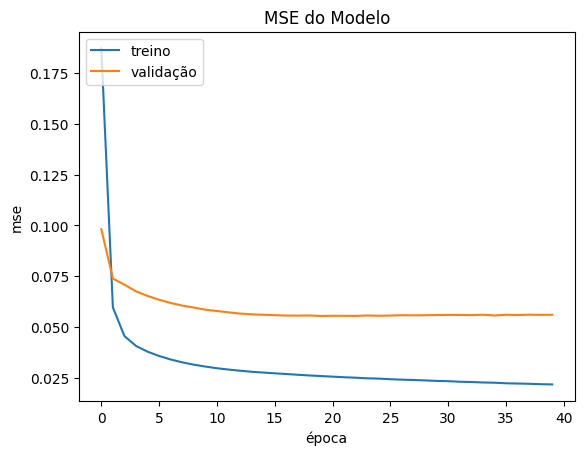

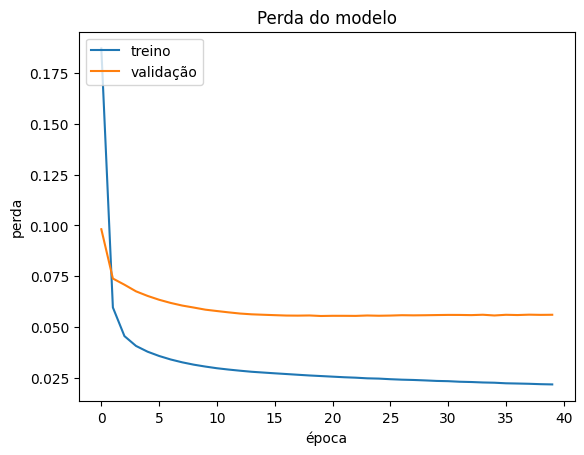

In [66]:
# lista todos os dados contidos no histórico de treinamento
print(history.history.keys())

# plotamos o erro calculado a partir do histórico
plt.plot(history.history['mse'])  # erro médio quadrático (treinamento)
plt.plot(history.history['val_mse']) # erro médio quadrático (teste)
plt.title('MSE do Modelo')
plt.ylabel('mse')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

# plotamos o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

## 4.8 Execução do Modelo Deep Learning no Conjunto de Teste

6/6 [==============================] - 0s 3ms/step


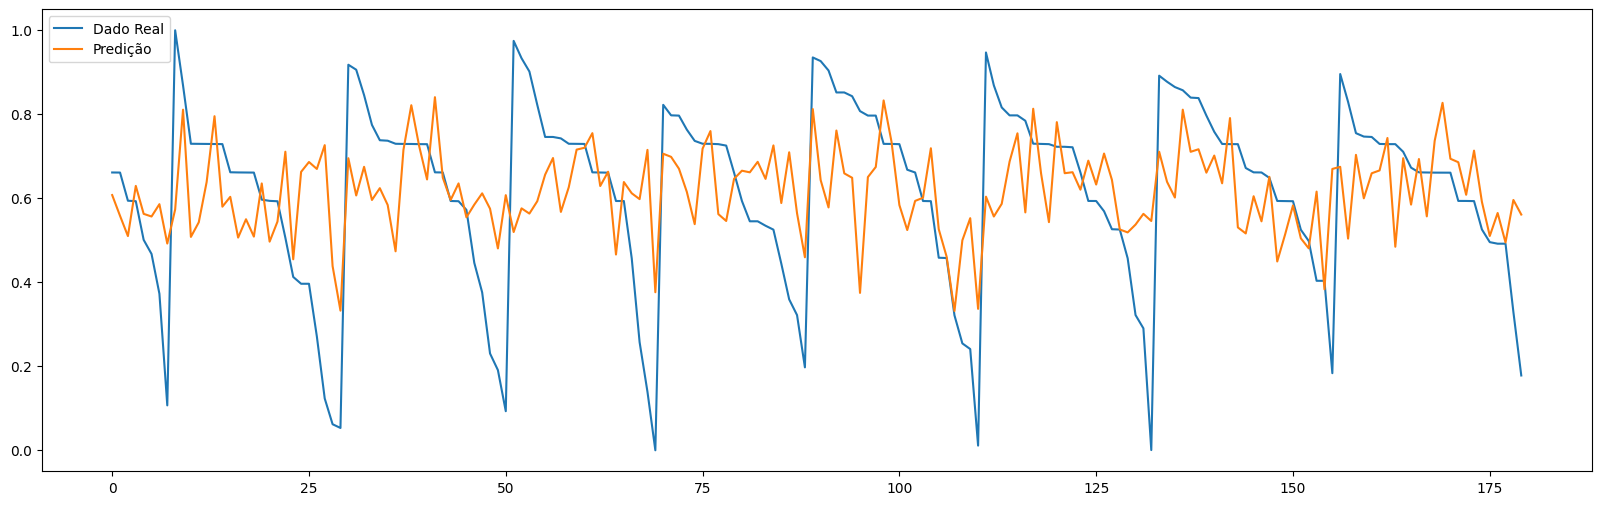

In [67]:
# Agora, vamos visualizar os dados reais vs os dados calculados na predição (usando os dados de treinamento)
plt.subplots(nrows=1, ncols=1,figsize=(20,6))
plt.plot(Y_test_transformado)
Y_pred=model.predict(X_test_transformado, batch_size=32)
plt.plot(Y_pred)
plt.legend(['Dado Real', 'Predição'], loc='upper left')
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular o Erro Médio Quadrático (MSE)
mse = mean_squared_error(Y_test_transformado, Y_pred)
print(f'Mean Squared Error: {mse}')

# Calcular o Erro Absoluto Médio (MAE)
mae = mean_absolute_error(Y_test_transformado, Y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.039113195532935734
Mean Absolute Error: 0.15190965397974635


### 4.8.1 Verificação do Modelo no Conjunto de Treinamento

27/27 [==============================] - 0s 2ms/step


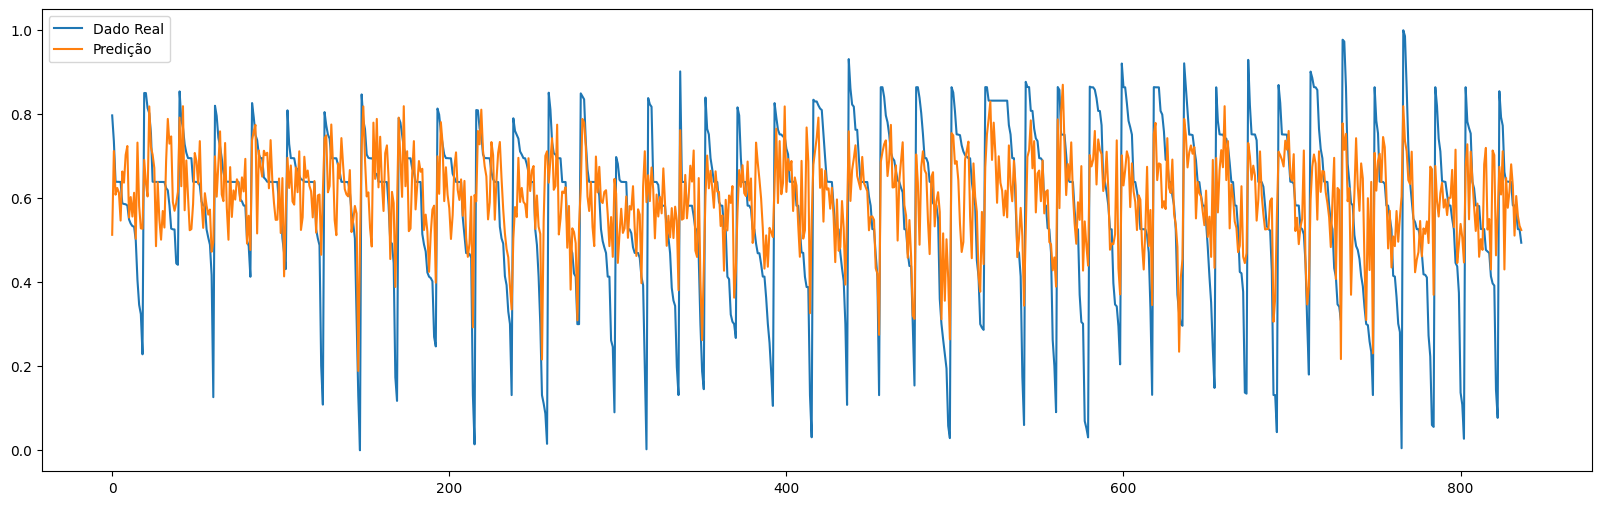

In [69]:
# Agora, vamos visualizar os dados reais vs os dados calculados na predição (usando os dados de treinamento)
plt.subplots(nrows=1, ncols=1,figsize=(20,6))
plt.plot(Y_train_transformado)
Y_pred=model.predict(X_train_transformado, batch_size=32)
plt.plot(Y_pred)
plt.legend(['Dado Real', 'Predição'], loc='upper left')
plt.show()

In [70]:
# Calcular o Erro Médio Quadrático (MSE)
mse = mean_squared_error(Y_train_transformado, Y_pred)
print(f'Mean Squared Error: {mse}')

# Calcular o Erro Absoluto Médio (MAE)
mae = mean_absolute_error(Y_train_transformado, Y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.02411282281757332
Mean Absolute Error: 0.11262135108734533


### 4.8.2 Verificação do Modelo no Conjunto de Validação

6/6 [==============================] - 0s 2ms/step


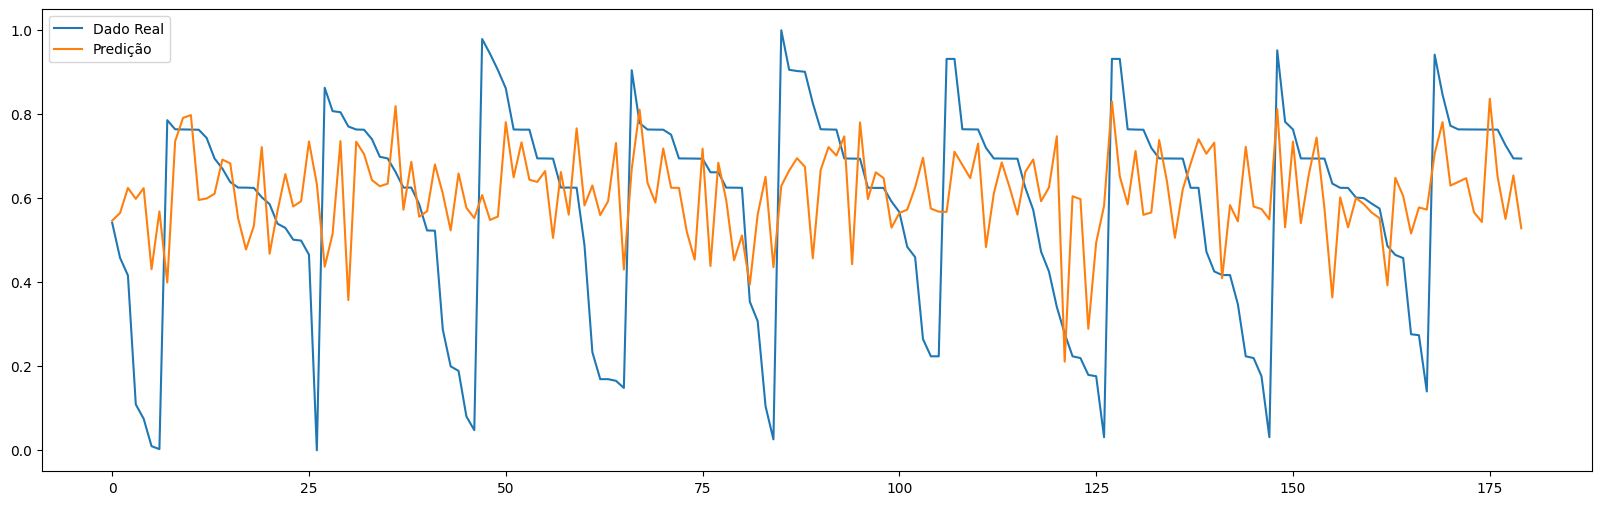

In [71]:
# Agora, vamos visualizar os dados reais vs os dados calculados na predição (usando os dados de validação)
plt.subplots(nrows=1, ncols=1,figsize=(20,6))
plt.plot(Y_val_transformado)
Y_pred=model.predict(X_val_transformado, batch_size=32)
plt.plot(Y_pred)
plt.legend(['Dado Real', 'Predição'], loc='upper left')
plt.show()

In [72]:
# Calcular o Erro Médio Quadrático (MSE)
mse = mean_squared_error(Y_val_transformado, Y_pred)
print(f'Mean Squared Error: {mse}')

# Calcular o Erro Absoluto Médio (MAE)
mae = mean_absolute_error(Y_val_transformado, Y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.055342929571688196
Mean Absolute Error: 0.1803745676816965


#5. Conclusão

O Resultado mostrou-se satisfatório para o MVP. Os próximos passos podem ser uma avaliação mais profunda da arquitetura do Modelo de Rede CNN e ajuste de parâmetros e aplicações de outras técnicas de limpeza de dados.